# Origin_data_Preprocess

In [ ]:
!pip install scanpy
!pip install anndata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=0132f749537738982ec52d853832b5353fee1deb293c94b84d368260754809e7
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8042 sha256=0ce1b71baff4eed258

In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad(
    '/content/drive/MyDrive/Retinoblastoma/rna_anno.h5ad')
adata

AnnData object with n_obs × n_vars = 20105 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell', 'dispersions', 'dispersions_norm'
    uns: 'Developmental_Stage_colors', '__scglue__', 'cosg', 'dendrogram_leiden', 'dendrogram_

In [ ]:
adata_raw = adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 20105 × 21705
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell'
    uns: 'Developmental_Stage_colors', '__scglue__', 'cosg', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 

In [ ]:
!pip install scglue

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 46.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 40.7 MB/s eta 0:00:00
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=201d3fd8ed64bb2c7cfaa4c3d561b6a4fb161a465bc00dc9110c08fe6987cbcf
  Stored in directory: /roo

In [ ]:
#import scglue
#scglue.data.get_gene_annotation(
#    adata_raw, gtf="/content/drive/MyDrive/Retinoblastoma/gencode.v31.chr_patch_hapl_scaff.annotation.gtf",
#    gtf_by="gene_name"
#)
#adata_raw.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

chrom chrom  chromStart  chromStart  chromEnd  chromEnd
LINC01409  chr1   NaN      205294         NaN    214212       NaN
FAM87B     chr1  chr1      246377    817370.0    248841  819837.0
LINC01128  chr1  chr1      256562    825137.0    288416  868202.0
LINC00115  chr1  chr1      255177    826205.0    256494  827522.0
FAM41C     chr1  chr1      297044    868070.0    306720  876903.0

In [ ]:
adata_raw.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

chrom  chromStart  chromEnd
LINC01409  chr1      205294    214212
FAM87B     chr1      246377    248841
LINC01128  chr1      256562    288416
LINC00115  chr1      255177    256494
FAM41C     chr1      297044    306720

In [ ]:
#adata.var['chromosome', 'start', 'end', 'gene_id', 'gene_name']
adata_raw.var['chromosome']=adata_raw.var['chrom'].values
adata_raw.var['start']=adata_raw.var['chromStart'].values
adata_raw.var['end']=adata_raw.var['chromEnd'].values
adata_raw.var['gene_id']=adata_raw.var['gene_ids'].values
adata_raw.var['gene_name']=adata_raw.var['name'].values

In [ ]:
list(set(adata_raw.obs['major_celltype']))

['Astrocytes',
 'Retinal stem cells',
 'RPE cells',
 'Lymphocytes',
 'STER cells',
 'Müller glia cells',
 'Photoreceptor cells',
 'P-Photoreceptor cells']

In [ ]:
!pip install infercnvpy
import infercnvpy as cnv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.3 MB/s eta 0:00:00
  Created wheel for gtfparse: filename=gtfparse-2.0.1-py3-none-any.whl size=15301 sha256=23ab7b3e570d1f63c325f5bcf2d3fcda92ffe36f1f31d33515787b5cc5ba0f5d
  Stored in directory: /root/.cache/pip/wheels/2f/ea/52/c722369f8507b71baf74fa2a963541610781501d60b67a7223
Successfully built gtfparse


In [ ]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata_raw,
    reference_key="major_celltype",
    reference_cat=[
        'Lymphocytes',
    ],
    window_size=250,
    #n_jobs=1,
)

  0%|          | 0/5 [00:00<?, ?it/s]

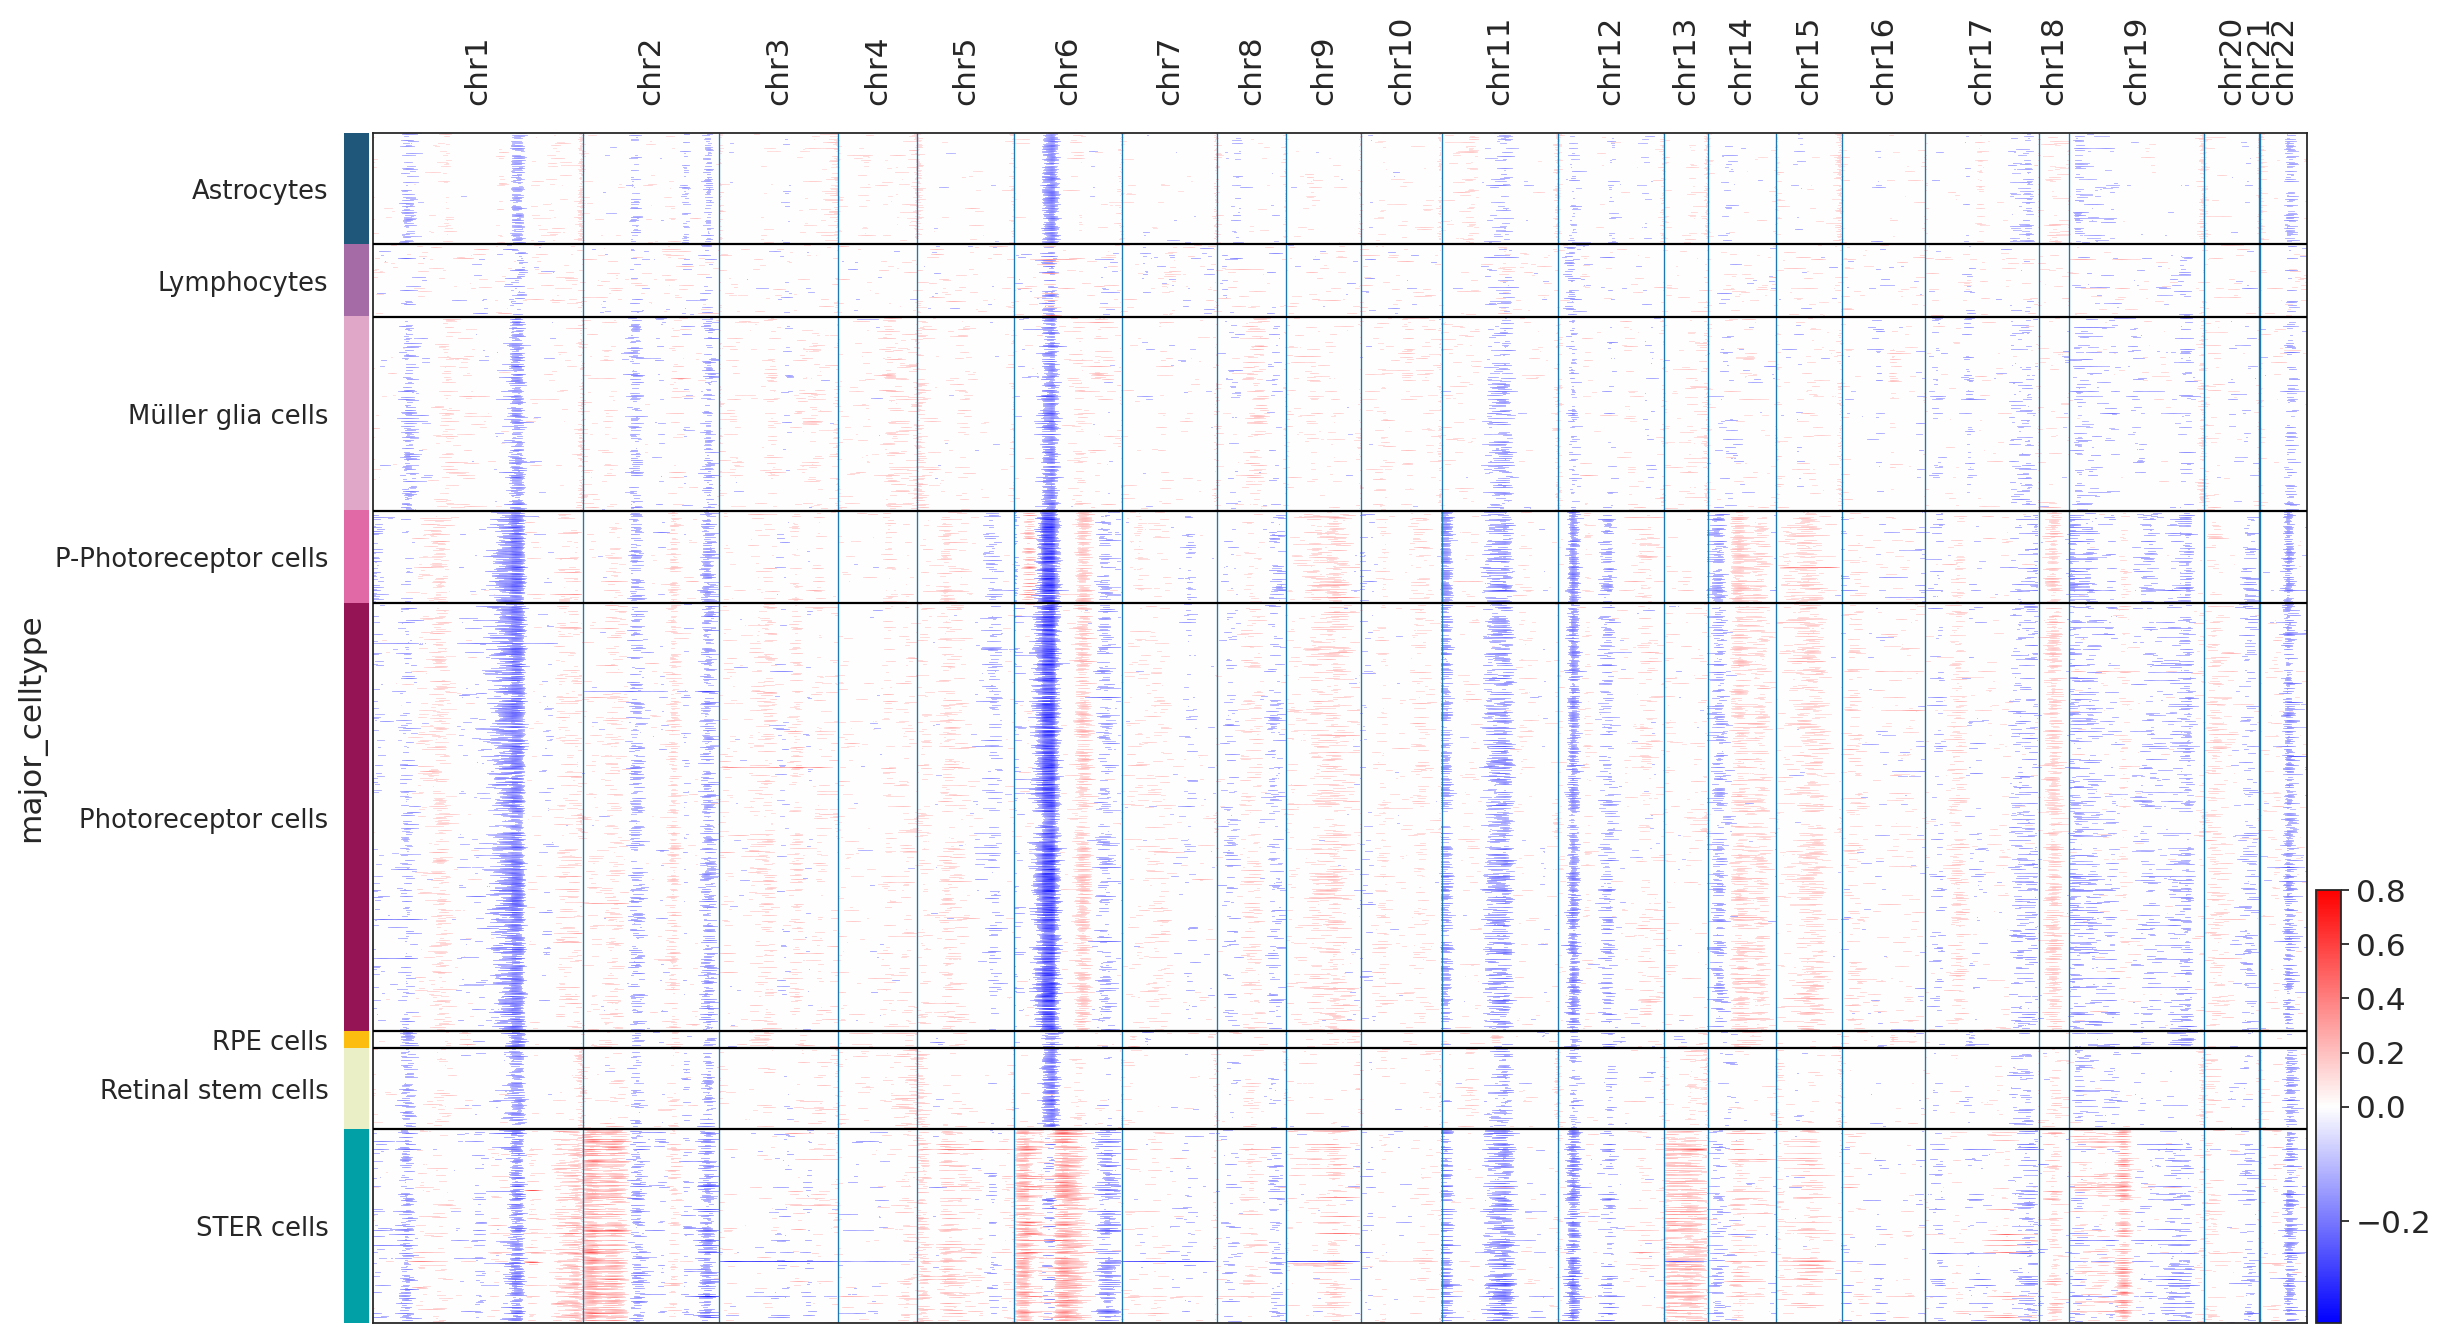

In [ ]:
ax=cnv.pl.chromosome_heatmap(adata_raw, groupby="major_celltype",show=False)
plt.savefig("Figure5_cnv.png",dpi=300,bbox_inches = 'tight')

In [ ]:
adata_raw

AnnData object with n_obs × n_vars = 20105 × 21705
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell', 'chromosome', 'start', 'end', 'gene_id'
    uns: 'Developmental_Stage_colors', '__scglue__', 'cosg', 'dendrogram_leiden', 'dend

In [ ]:
cnv.pp.neighbors(adata_raw,use_rep='glue')
cnv.tl.leiden(adata_raw)

computing neighbors
    finished: added to `.uns['cnv_neighbors']`
    `.obsp['cnv_neighbors_distances']`, distances for each pair of neighbors
    `.obsp['cnv_neighbors_connectivities']`, weighted adjacency matrix (0:00:42)
running Leiden clustering
    finished: found 24 clusters and added
    'cnv_leiden', the cluster labels (adata.obs, categorical) (0:00:05)


         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:06)
Storing dendrogram info using `.uns['dendrogram_cnv_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


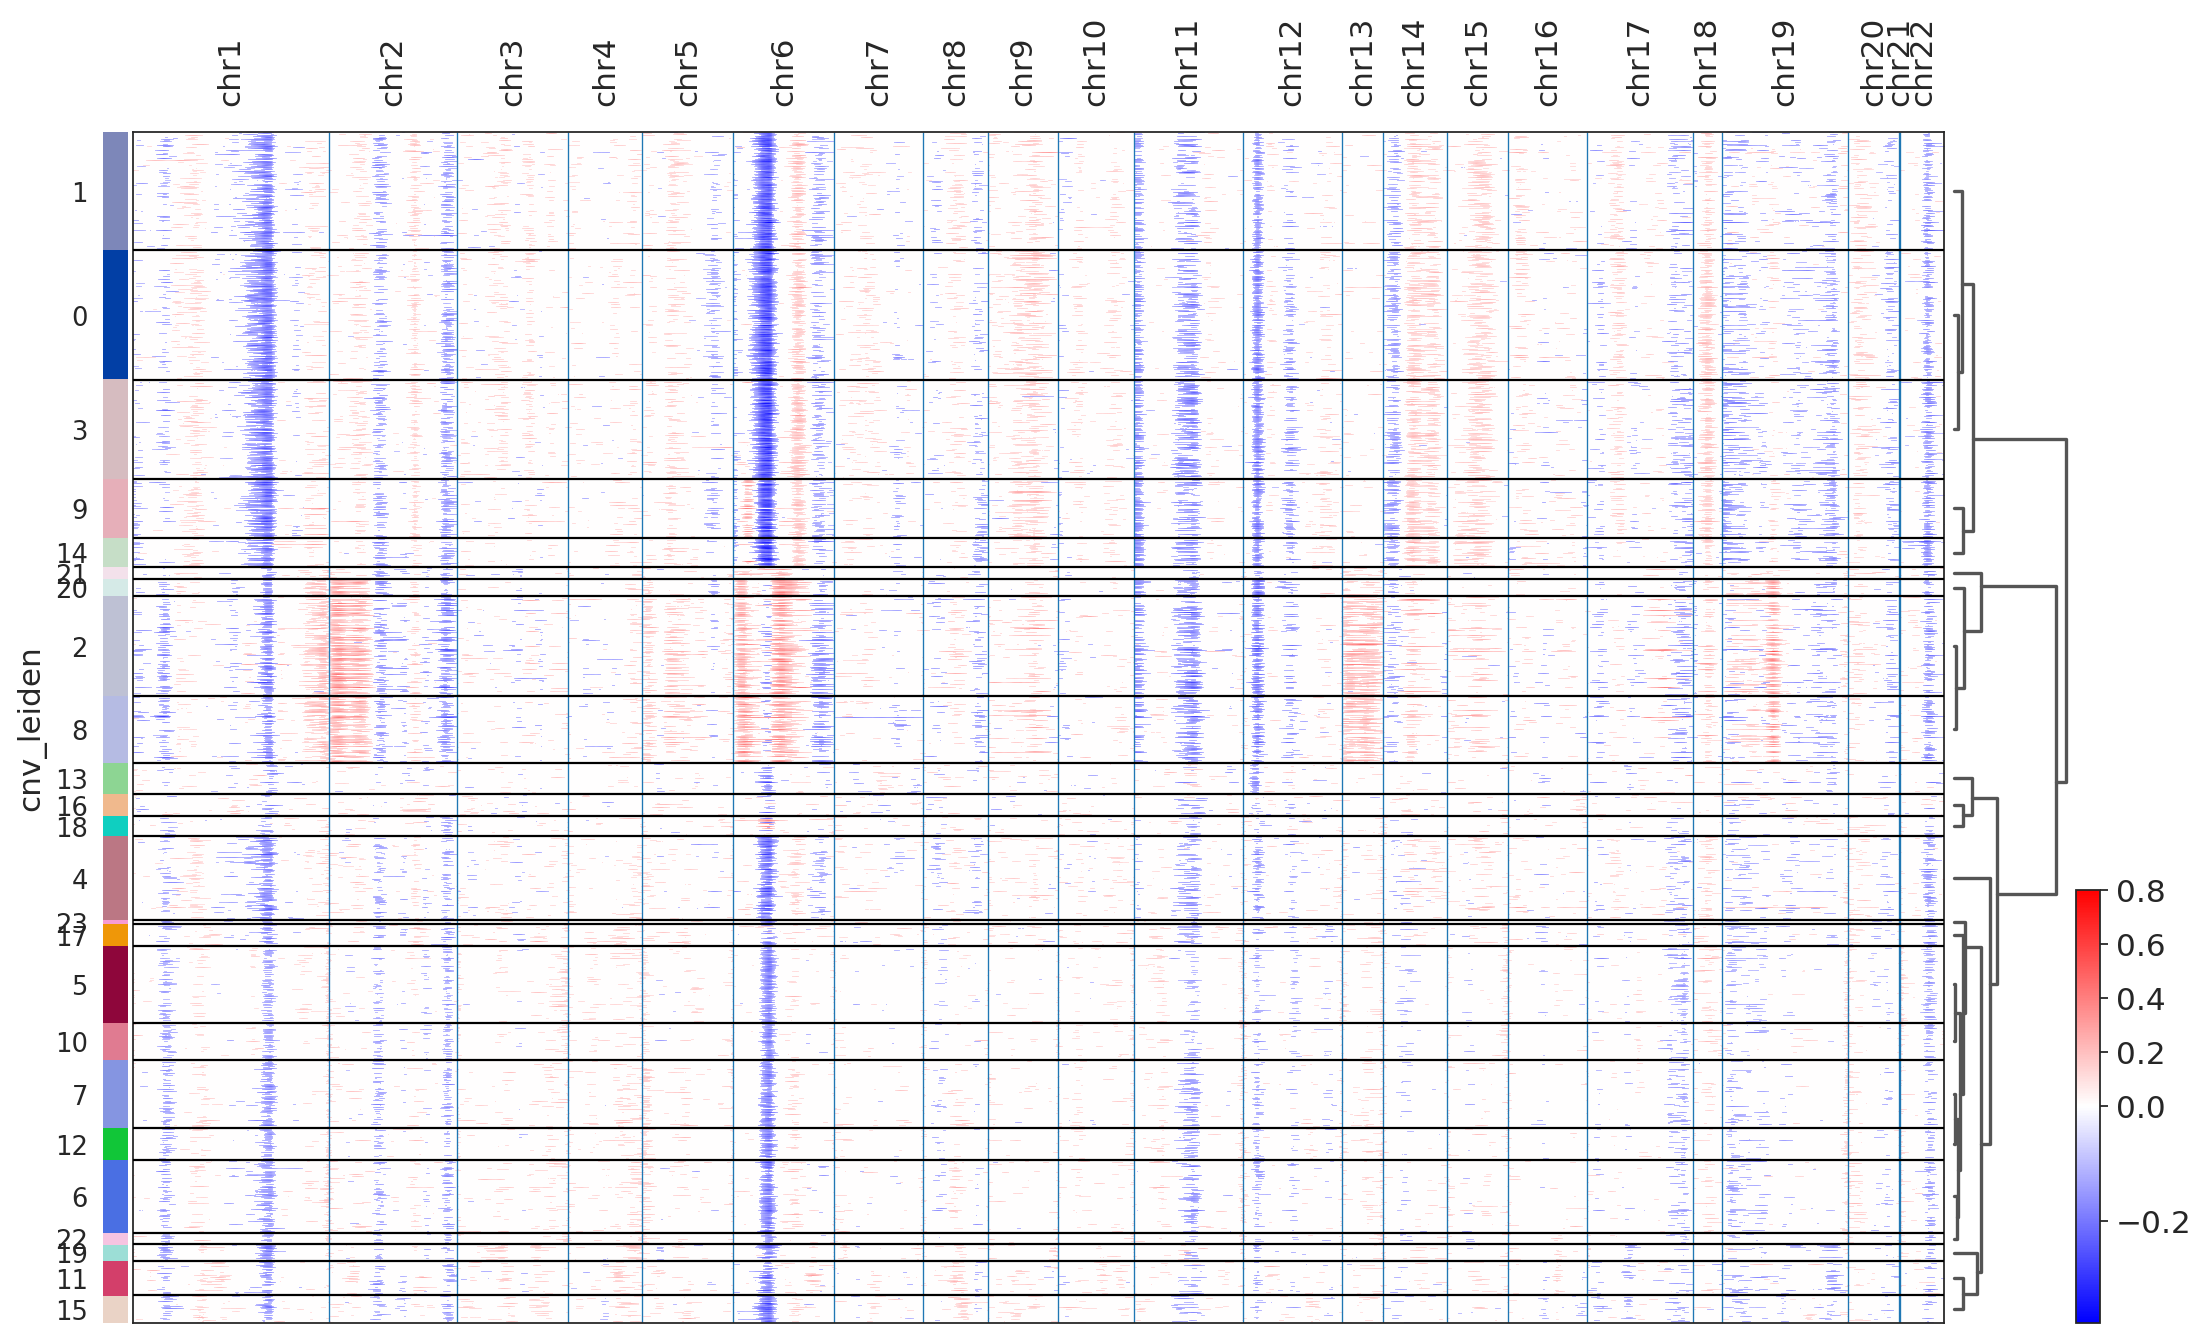

In [ ]:
cnv.pl.chromosome_heatmap(adata_raw, groupby="cnv_leiden", dendrogram=True)

In [ ]:
cnv.tl.umap(adata_raw)
cnv.tl.cnv_score(adata_raw)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


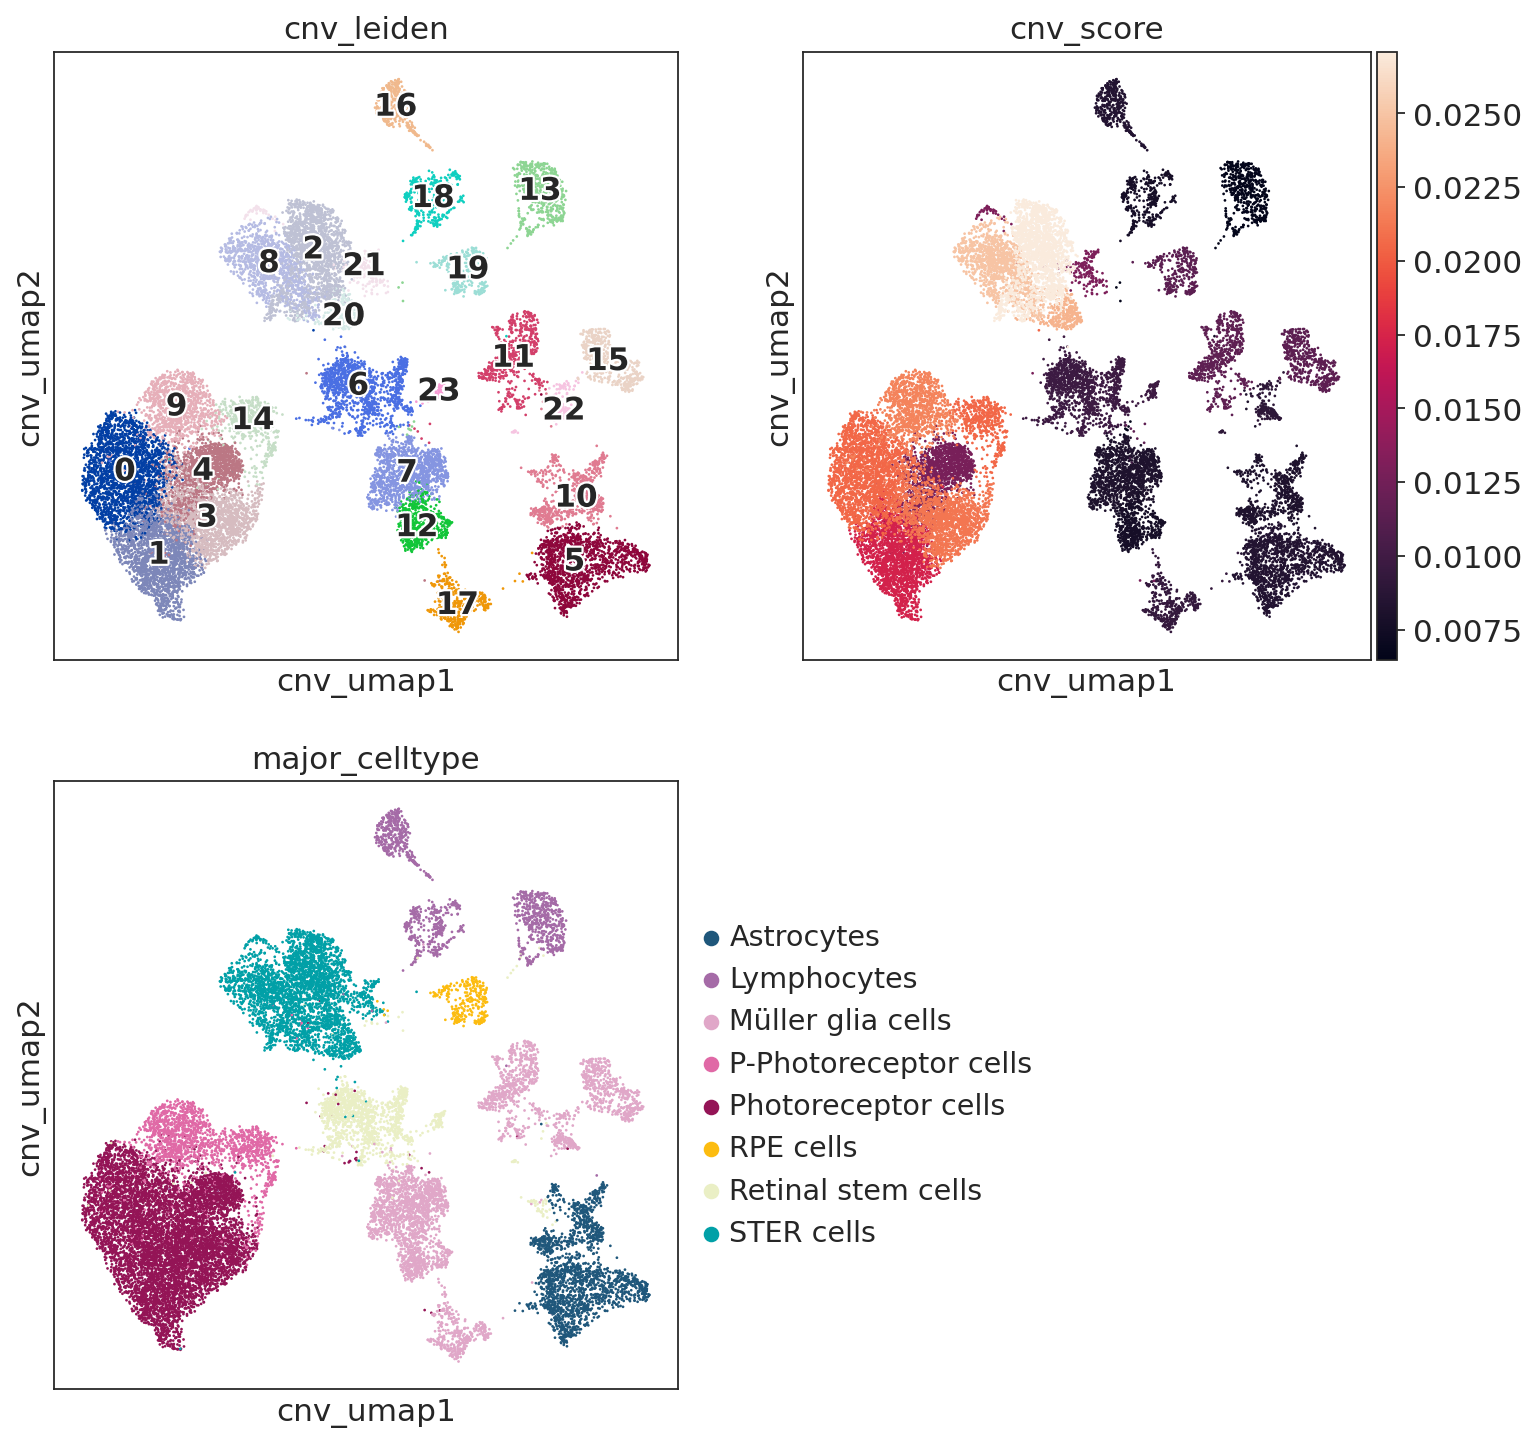

In [ ]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
ax4.axis("off")
cnv.pl.umap(
    adata_raw,
    color="cnv_leiden",
    legend_loc="on data",
    legend_fontoutline=2,
    ax=ax1,
    show=False,
)
cnv.pl.umap(adata_raw, color="cnv_score", ax=ax2, show=False)
cnv.pl.umap(adata_raw, color="major_celltype", ax=ax3)

In [ ]:
# 设置色卡
sc_color_Gene=['#FAFCCF',#0C2064 #浅色
        '#49B8C2', #中间
        '#0C2064', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

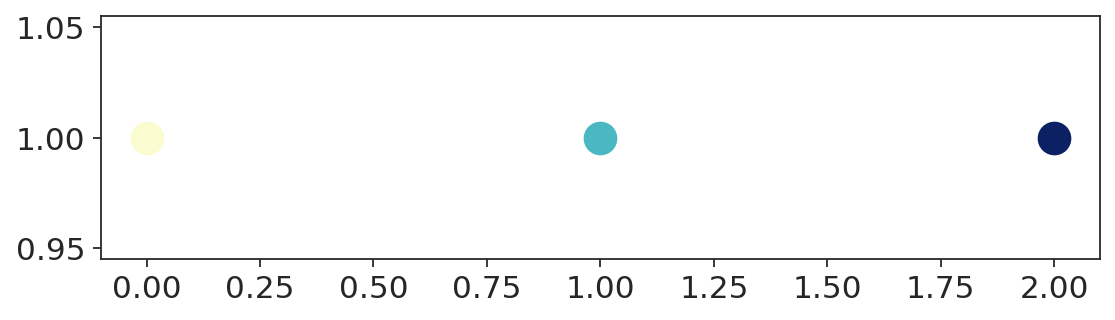

In [ ]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

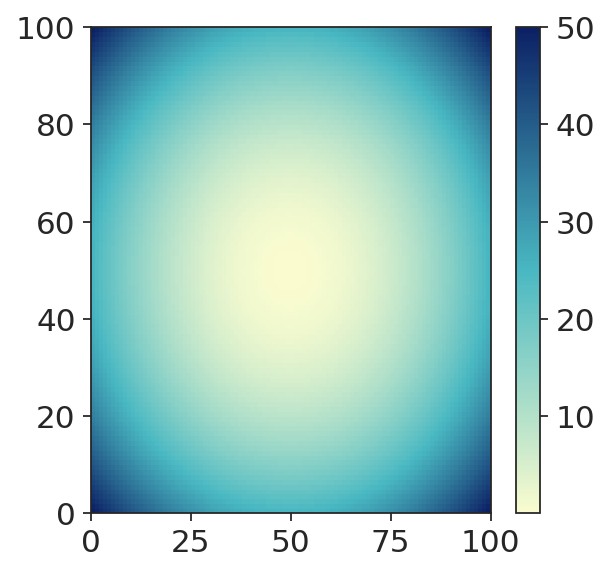

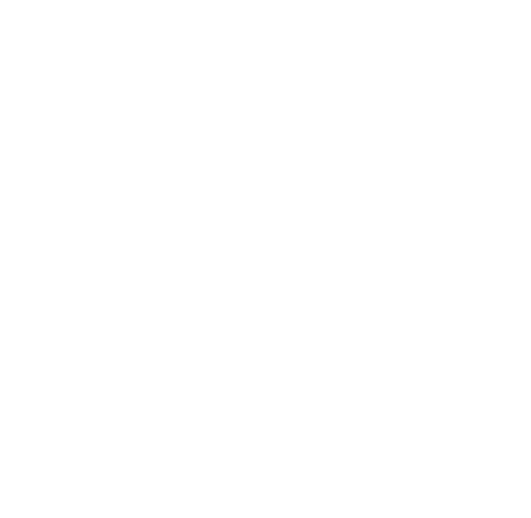

In [ ]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

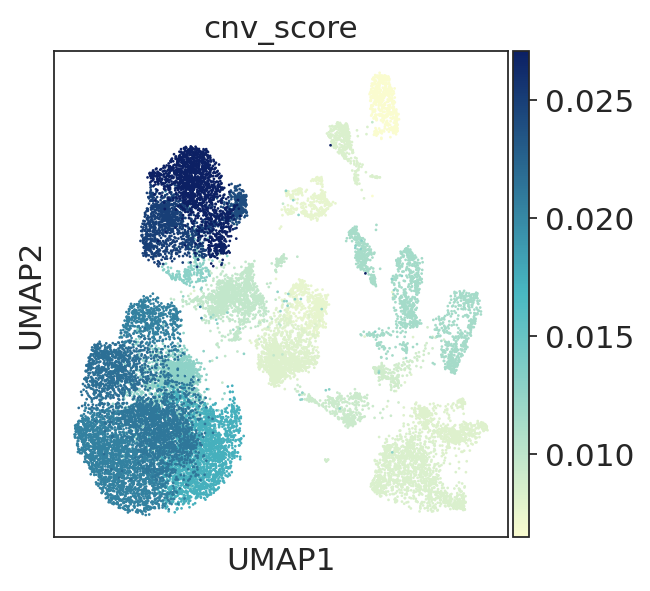

In [ ]:
ax2 = sc.pl.umap(adata_raw, color="cnv_score", show=False,cmap=genecmap)
plt.savefig("Figure5_umap_cnv.png",dpi=300,bbox_inches = 'tight')

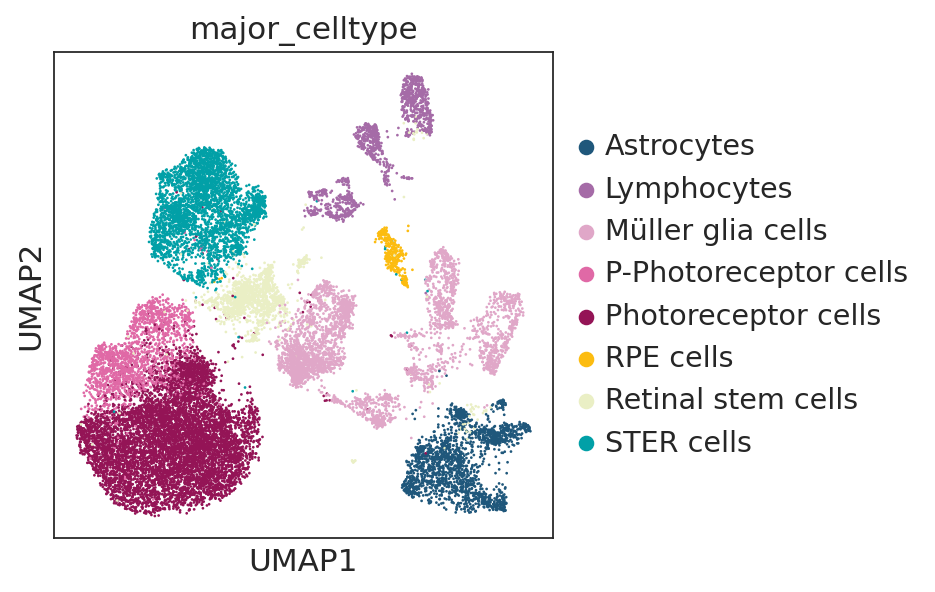

In [ ]:
sc.pl.umap(adata_raw, color="major_celltype", show=False )
plt.savefig("Figure5_major_celltype.png",dpi=300,bbox_inches = 'tight')

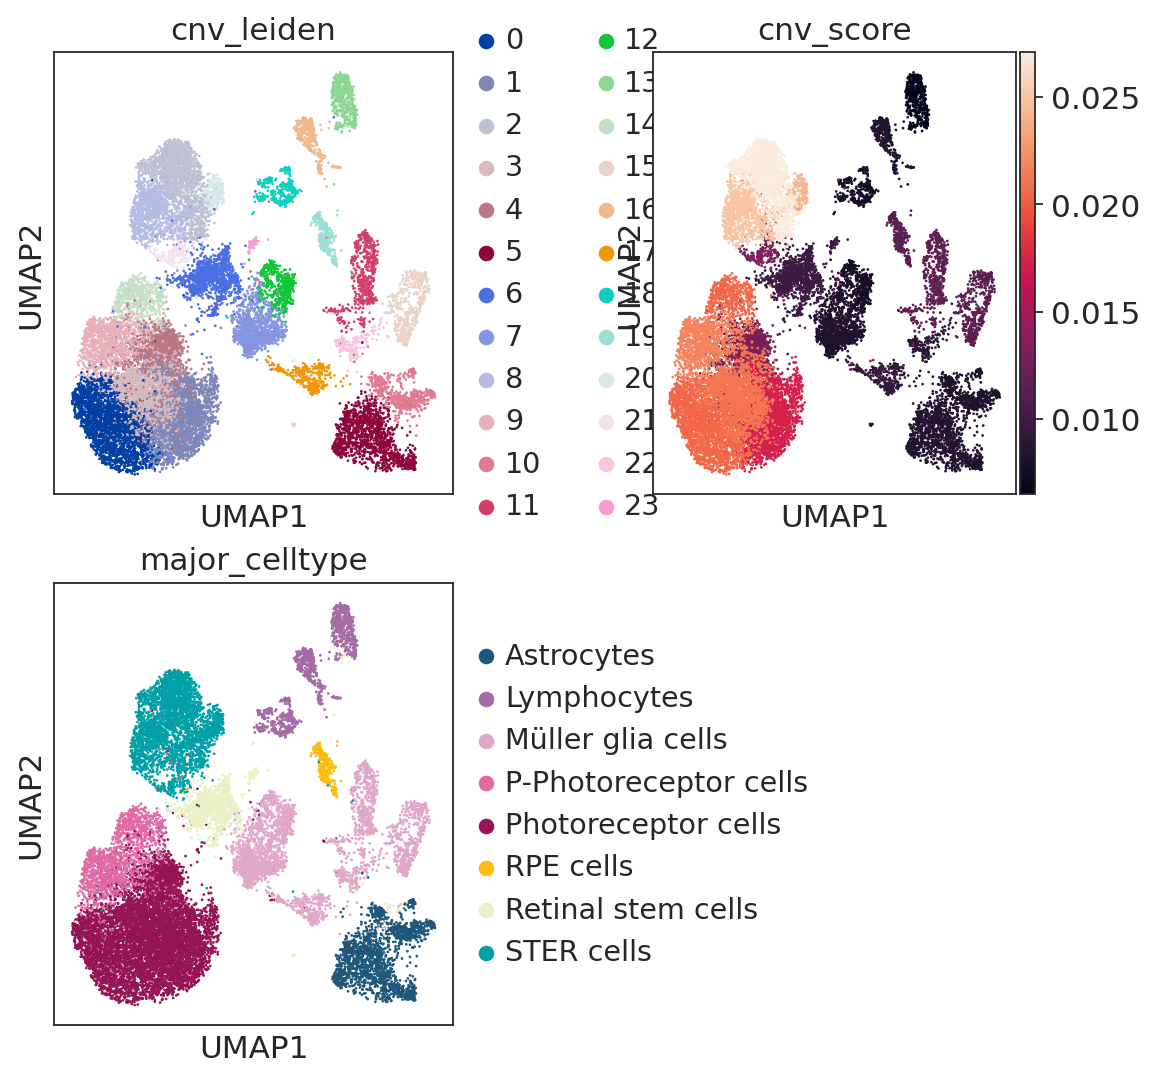

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(8, 8), gridspec_kw=dict(wspace=0.5)
)
ax4.axis("off")
sc.pl.umap(adata_raw, color="cnv_leiden", ax=ax1, show=False)
sc.pl.umap(adata_raw, color="cnv_score", ax=ax2, show=False)
sc.pl.umap(adata_raw, color="major_celltype", ax=ax3)

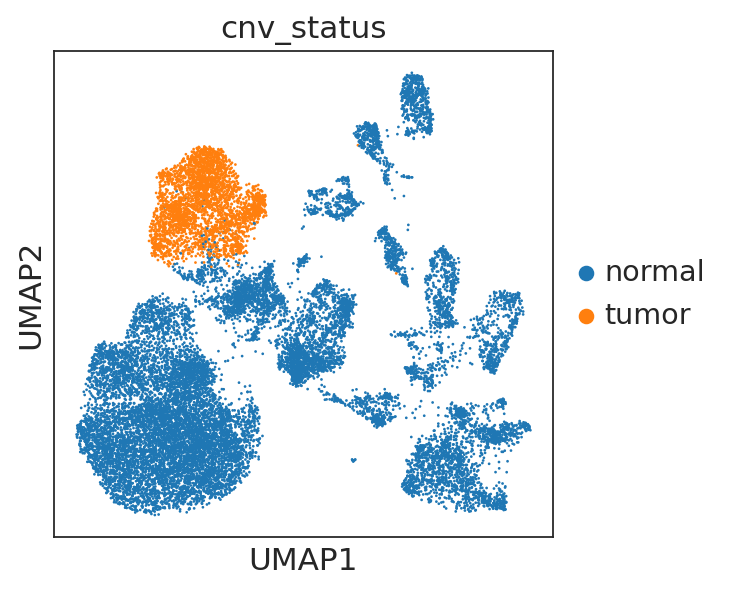

In [ ]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(wspace=0.5))
#cnv.pl.umap(adata, color="cnv_status")
sc.pl.umap(adata_raw, color=["cnv_status"],wspace=0.5,show=False)
plt.savefig("Figure5_tumor.png",dpi=300,bbox_inches = 'tight')

In [ ]:
adata_raw.obs["cnv_status"] = "normal"
adata_raw.obs.loc[
    adata_raw.obs["cnv_score"]>0.0225, "cnv_status"
] = "tumor"

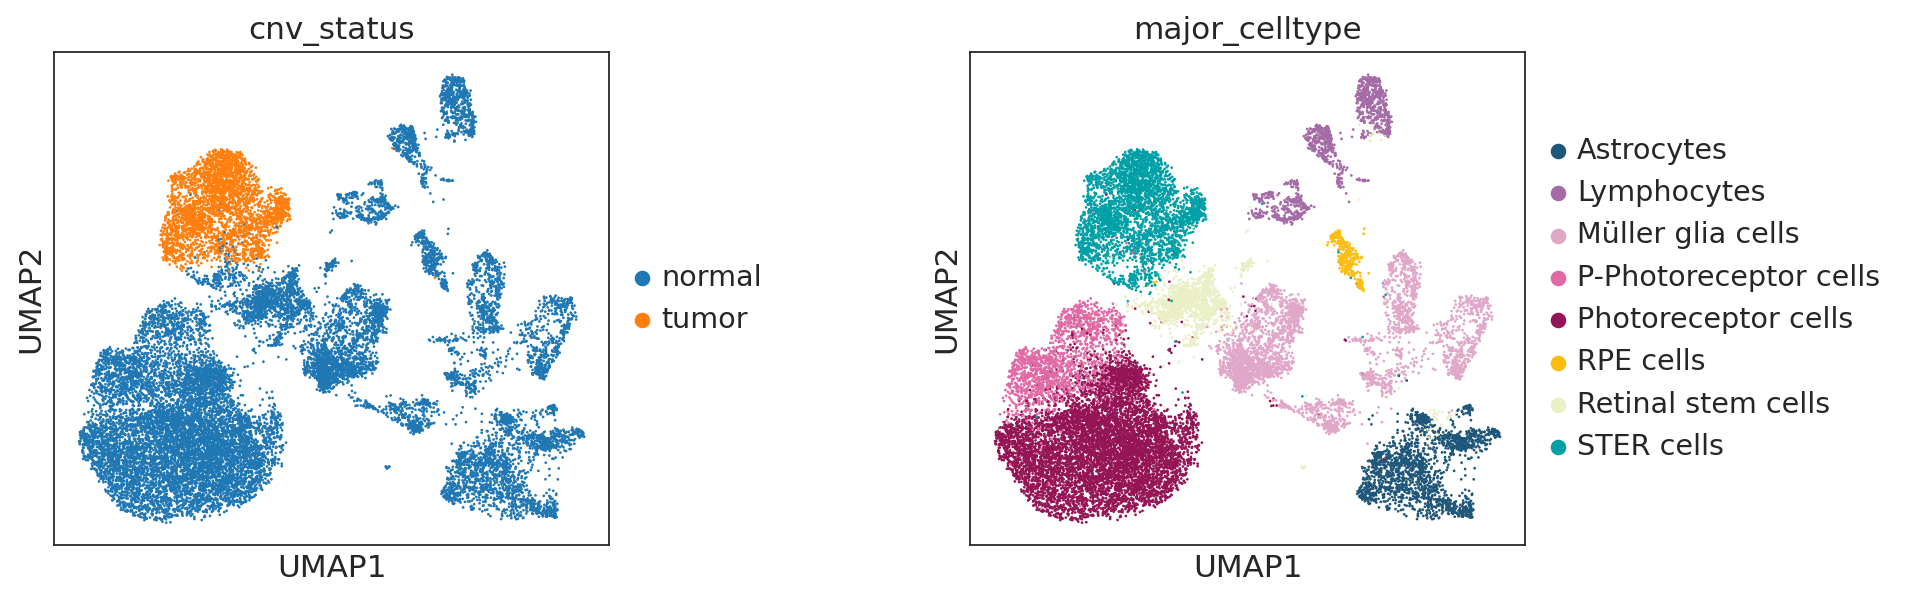

In [ ]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(wspace=0.5))
#cnv.pl.umap(adata, color="cnv_status")
sc.pl.umap(adata_raw, color=["cnv_status","major_celltype"],wspace=0.5)

In [ ]:
adata_raw.write_h5ad('/content/drive/MyDrive/Retinoblastoma/RB_infercnv.h5ad',compression='gzip')

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Retinoblastoma/rna_anno_cnv.h5ad')
adata

In [ ]:
adata_raw = sc.read_h5ad('/content/drive/MyDrive/Retinoblastoma/RB_infercnv.h5ad')
adata_raw

In [ ]:
adata.obs = adata_raw.obs
adata.obsm = adata_raw.obsm

In [ ]:
adata.write_h5ad('/content/drive/MyDrive/Retinoblastoma/rna_anno_cnv.h5ad',compression='gzip')

# Drug Annotation

In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Retinoblastoma/rna_anno_cnv.h5ad')
adata

AnnData object with n_obs × n_vars = 20105 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw', 'cnv_leiden', 'cnv_score', 'cnv_status'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell', 'dispersions', 'dispersions_norm'
    uns: 'Developmental_Stage_colors', '__scglue__', 

In [ ]:
adata.obs

initial_size_spliced  initial_size_unspliced  \
AAACCCACAACTCGTA-759                   711                     280   
AAACCCATCAGTGTTG-759                   366                     149   
AAACCCATCGTAACAC-759                   177                     331   
AAACGAACAGTCAGTT-759                   443                      80   
AAACGAAGTCCCTCAT-759                   285                     140   
...                                    ...                     ...   
TTTGTTGCATGGAAGC-762                   954                     520   
TTTGTTGGTAGCTGAG-762                   718                     412   
TTTGTTGGTCCACGCA-762                   273                     215   
TTTGTTGTCGAGAGAC-762                  1356                     281   
TTTGTTGTCTCGACCT-762                   448                     452   

                      initial_size          Tissue     Developmental_Stage  \
AAACCCACAACTCGTA-759         711.0  Retinoblastoma  Retinoblastoma_4months   
AAACCCATCAGTGTTG-759         366.0  Retinoblastoma  Retinoblastoma_4months   
AAACCCATCGTAACAC-759         177.0  Retinoblastoma  Retinoblastoma_4months   
AAACGAACAGTCAGTT-759         443.0  Retinoblastoma  Retinoblastoma_4months   
AAACGAAGTCCCTCAT-759         285.0  Retinoblastoma  Retinoblastoma_4months   
...                            ...             ...                     ...   
TTTGTTGCATGGAAGC-762         954.0  Retinoblastoma   Retinoblastoma_2years   
TTTGTTGGTAGCTGAG-762         718.0  Retinoblastoma   Retinoblastoma_2years   
TTTGTTGGTCCACGCA-762         273.0  Retinoblastoma   Retinoblastoma_2years   
TTTGTTGTCGAGAGAC-762        1356.0  Retinoblastoma   Retinoblastoma_2years   
TTTGTTGTCTCGACCT-762         448.0  Retinoblastoma   Retinoblastoma_2years   

                      n_genes  doublet_score  predicted_doublet  \
AAACCCACAACTCGTA-759      824       0.053665              False   
AAACCCATCAGTGTTG-759      429       0.031600              False   
AAACCCATCGTAACAC-759      517       0.033898              False   
AAACGAACAGTCAGTT-759      384       0.020057              False   
AAACGAAGTCCCTCAT-759      390       0.009752              False   
...                       ...            ...                ...   
TTTGTTGCATGGAAGC-762     1112       0.011106              False   
TTTGTTGGTAGCTGAG-762      963       0.009752              False   
TTTGTTGGTCCACGCA-762      522       0.007698              False   
TTTGTTGTCGAGAGAC-762     1428       0.023501              False   
TTTGTTGTCTCGACCT-762      863       0.046945              False   

                      n_genes_by_counts  total_counts  ...  pct_counts_mt  \
AAACCCACAACTCGTA-759                824        1254.0  ...       5.342903   
AAACCCATCAGTGTTG-759                429         666.0  ...       7.807807   
AAACCCATCGTAACAC-759                517         595.0  ...       4.873950   
AAACGAACAGTCAGTT-759                384         696.0  ...       9.195402   
AAACGAAGTCCCTCAT-759                390         562.0  ...       6.227758   
...                                 ...           ...  ...            ...   
TTTGTTGCATGGAAGC-762               1112        1787.0  ...       3.749300   
TTTGTTGGTAGCTGAG-762                963        1397.0  ...       2.934860   
TTTGTTGGTCCACGCA-762                522         604.0  ...       1.324503   
TTTGTTGTCGAGAGAC-762               1428        2171.0  ...       7.185629   
TTTGTTGTCTCGACCT-762                863        1042.0  ...       0.767754   

                         domain leiden balancing_weight    n_counts  \
AAACCCACAACTCGTA-759  scRNA-seq     19         1.352541 -152.230194   
AAACCCATCAGTGTTG-759  scRNA-seq      2         0.804646 -333.624695   
AAACCCATCGTAACAC-759  scRNA-seq      0         1.588329 -228.343552   
AAACGAACAGTCAGTT-759  scRNA-seq      2         1.181992 -402.761047   
AAACGAAGTCCCTCAT-759  scRNA-seq      2         0.804646 -472.356812   
...                         ...    ...              ...         ...   
TTTGTTGCATGGAAGC-

In [ ]:
adata_cancer = adata[adata.obs['cnv_status']=='tumor']
adata_cancer

View of AnnData object with n_obs × n_vars = 3097 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw', 'cnv_leiden', 'cnv_score', 'cnv_status'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell', 'dispersions', 'dispersions_norm'
    uns: 'Developmental_Stage_colors', '__scgl

In [ ]:
!pip install Pyomic
!pip install multiprocess
!pip install igraph
!pip install louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 KB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 KB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━

Creating directory /root/.config/bioservices 
Automatically determine clustering resolution...
Clustering test: resolution =  0.4
robustness score =  0.7107066953658788
time: {} 74.18047404289246

Clustering test: resolution =  0.6
robustness score =  0.3915214981065732
time: {} 31.91933846473694

Clustering test: resolution =  0.8
robustness score =  0.49485542916554104
time: {} 32.982845067977905

Clustering test: resolution =  1.0
robustness score =  0.5239200475835537
time: {} 31.08168864250183

Clustering test: resolution =  1.2
robustness score =  0.469404047574623
time: {} 31.648733615875244

Clustering test: resolution =  1.4
robustness score =  0.5093088199629313
time: {} 31.805282831192017

resolution with highest score:  0.4
time: {} 233.67595052719116


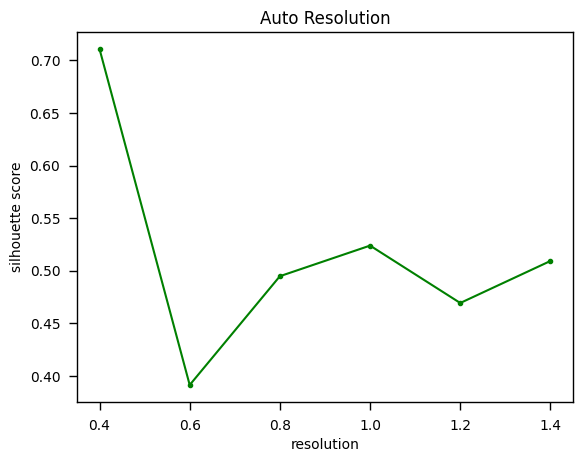

In [ ]:
import Pyomic
adata, res,plot_df = Pyomic.single.autoResolution(adata_cancer,cpus=4)

In [ ]:
import os
results_file = os.path.join('/content/drive/MyDrive/Retinoblastoma/scDrug_pred', 'scanpy_cancer_obj.h5ad')
adata_cancer.write(results_file)

In [ ]:
import scanpy as sc
import os
results_file = os.path.join('/content/drive/MyDrive/Retinoblastoma/scDrug_pred', 'scanpy_cancer_obj.h5ad')
adata_cancer=sc.read('/content/drive/MyDrive/Retinoblastoma/scDrug_pred/scanpy_cancer_obj.h5ad')


In [ ]:
!git clone https://github.com/b06902075/scDrug

Cloning into 'scDrug'...
remote: Enumerating objects: 413, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 413 (delta 41), reused 49 (delta 26), pack-reused 345
Receiving objects: 100% (413/413), 173.01 MiB | 47.32 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [ ]:
import Pyomic
print(Pyomic.__file__)

/usr/local/lib/python3.9/dist-packages/Pyomic/__init__.py


In [ ]:
Pyomic.utils.download_GDSC_data()
Pyomic.utils.download_CaDRReS_model()

......GDSC data download start: masked_drugs
......Downloading dataset save to models/masked_drugs.csv
......Creating directory models
......[masked_drugs Size of file]: 0.00 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！1.1956806182861328.2f s
......GDSC data download start: GDSC_exp
......Downloading dataset save to models/GDSC_exp.tsv.gz
......[GDSC_exp Size of file]: 10.98 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！5.881531238555908.2f s
......GDSC data download finished!
......CaDRReS model download start: cadrres-wo-sample-bias_output_dict_all_genes
......Downloading dataset save to models/cadrres-wo-sample-bias_output_dict_all_genes.pickle
......[cadrres-wo-sample-bias_output_dict_all_genes Size of file]: 0.69 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！1.8356361389160156.2f s
......CaDRReS model download start: cadrres-wo-sample

In [ ]:
!git clone https://github.com/CSB5/CaDRReS-Sc

Cloning into 'CaDRReS-Sc'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 378 (delta 4), reused 5 (delta 1), pack-reused 369
Receiving objects: 100% (378/378), 48.76 MiB | 35.44 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [ ]:
import Pyomic
job=Pyomic.single.Drug_Response(adata_cancer,scriptpath='CaDRReS-Sc',
                                modelpath='models/',
                                output='/content/result')

Calculating kernel features based on 14812 common genes
(21705, 4) (17419, 1018)
Predicting drug response for using CaDRReS(GDSC): cadrres-wo-sample-bias
done!
Ploting...
done!


# scDrug

In [ ]:
import scanpy as sc
import numpy as np
import anndata as ad
import pandas as pd

In [ ]:
adata_cancer=sc.read('/content/drive/MyDrive/Retinoblastoma/scDrug_pred/scanpy_cancer_obj.h5ad')

In [ ]:
!pip3 install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sc.tl.pca(adata_cancer, n_comps=100, svd_solver="arpack")
sc.pp.neighbors(adata_cancer, use_rep="X_pca", metric="cosine",n_neighbors=20, random_state = 112)
sc.tl.leiden(adata_cancer)
sc.tl.paga(adata_cancer)
sc.pl.paga(adata_cancer, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_cancer,init_pos='paga')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


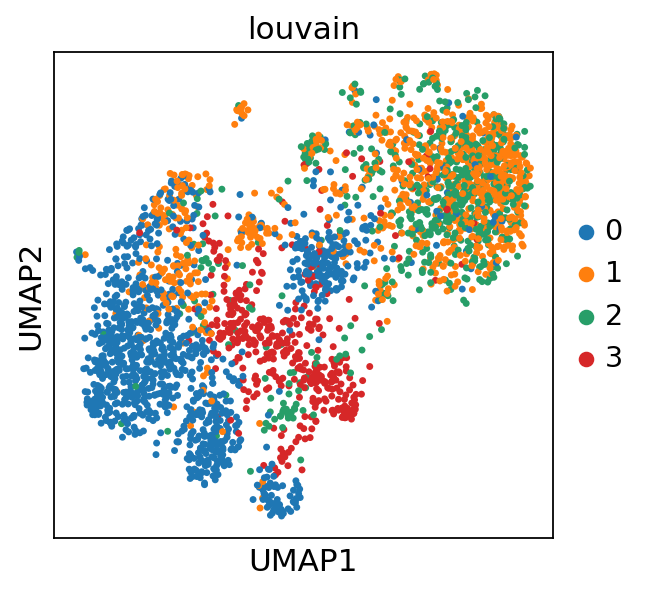

In [ ]:
sc.pl.umap(adata_cancer,color=['louvain'])

In [ ]:
drug_kill = pd.read_csv('/content/drive/MyDrive/Retinoblastoma/scDrug_pred/drug_kill_prediction.csv',index_col=[0],header=[1])
drug_kill

Erlotinib  AICA Ribonucleotide  Camptothecin  Vinblastine  \
Drug Name                                                              
0             76.578               55.926        65.195       46.871   
1             70.595               55.460        53.404       40.391   
2             80.810               56.497        57.881       41.115   
3             86.965               58.772        68.542       49.441   

           Cisplatin  Cytarabine  Docetaxel  Methotrexate  Gefitinib  \
Drug Name                                                              
0             53.420      55.462     23.744        81.929     61.026   
1             45.978      46.377     15.741        79.250     54.282   
2             47.615      49.797     19.198        73.437     58.091   
3             55.094      58.580     30.756        76.732     64.573   

           Navitoclax  ...  Dasatinib  CGP-60474  CGP-082996  A-770041  \
Drug Name              ...                                               
0              74.809  ...     60.216     29.767      40.721    50.895   
1              73.039  ...     45.591     25.961      36.249    43.165   
2              74.009  ...     77.752     32.983      52.234    68.966   
3              72.396  ...     87.577     39.345      62.549    79.058   

           WH-4-023  BI-2536  BMS-536924  JW-7-52-1  GW843682X  MG-132  
Drug Name                                                               
0            57.592   33.160      45.712     24.911     26.373  25.726  
1            49.556   27.267      38.557     23.435     22.113  21.452  
2            71.495   36.003      53.388     26.930     29.189  27.618  
3            78.517   45.997      61.654     30.451     36.550  32.735  

[4 rows x 171 columns]

In [ ]:
drug_kill.loc[:,'Epothilone B']

Drug Name
0    54.166
1    43.705
2    44.676
3    57.691
Name: Epothilone B, dtype: float64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


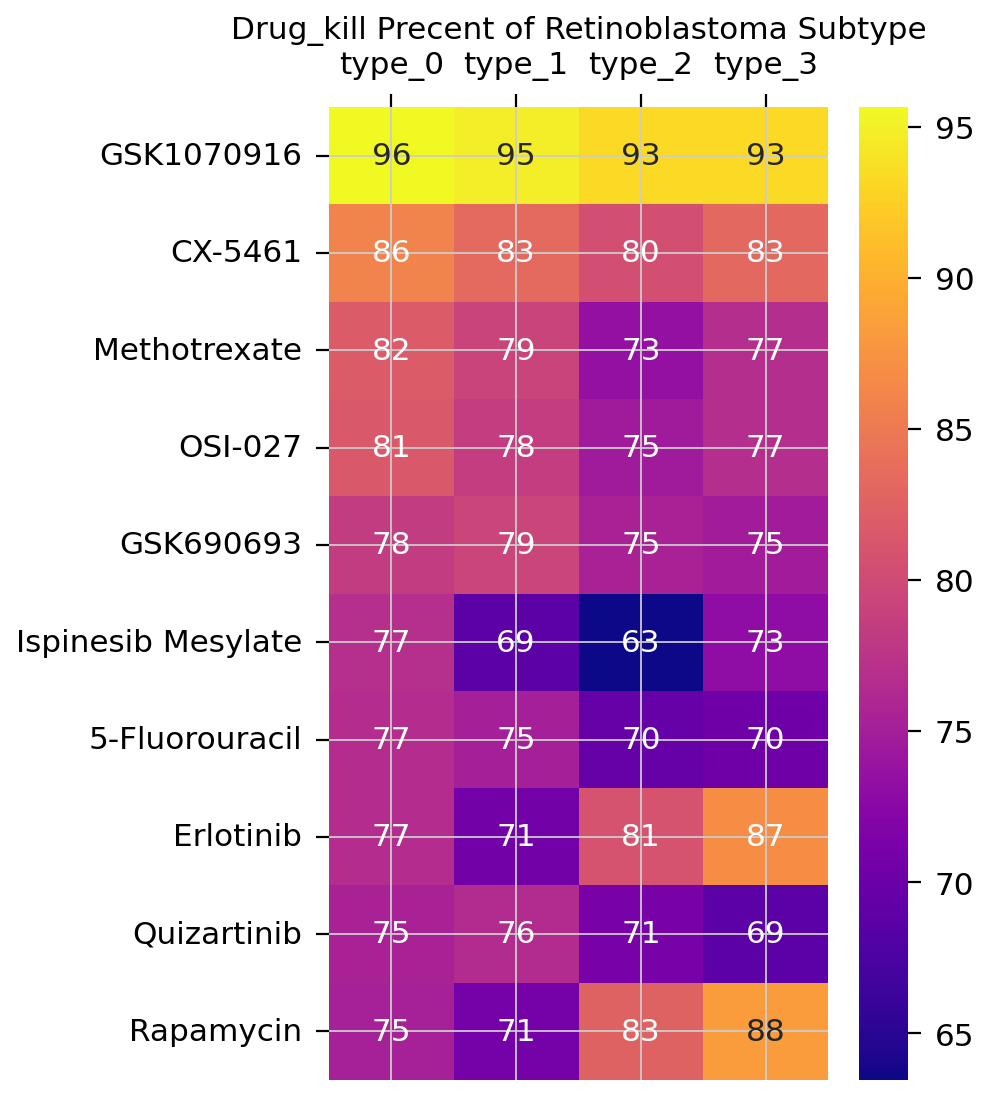

In [ ]:
!pip install seaborn
import matplotlib.pyplot as plt 
import seaborn as sns 
drug_kill_top_10 = drug_kill.T.sort_values(by=[0],ascending=False).iloc[0:10,:]
drug_kill_top_10
fig, ax = plt.subplots(figsize = (5, 8))
drug_kill_top_10.columns=['type_0','type_1','type_2','type_3']
ax = sns.heatmap(drug_kill_top_10, annot=True,cmap='plasma')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title('Drug_kill Precent of Retinoblastoma Subtype')
plt.savefig("Figure5_Drug_Kill.png",dpi=300,bbox_inches = 'tight')

In [ ]:
IC50 = pd.read_csv('/content/drive/MyDrive/Retinoblastoma/scDrug_pred/IC50_prediction.csv',index_col=[0],header=[1])
IC50

Erlotinib  AICA Ribonucleotide  Camptothecin  Vinblastine  \
Drug Name                                                              
0              0.656                0.981         0.044        0.086   
1              0.671                0.985         0.052        0.076   
2              0.616                0.964         0.039        0.075   
3              0.595                0.958         0.043        0.087   

           Cisplatin  Cytarabine  Docetaxel  Methotrexate  Gefitinib  \
Drug Name                                                              
0              0.593       0.422      0.109         0.360      0.644   
1              0.605       0.433      0.121         0.353      0.657   
2              0.590       0.416      0.102         0.375      0.634   
3              0.583       0.412      0.090         0.386      0.627   

           Navitoclax  ...  Dasatinib  CGP-60474  CGP-082996  A-770041  \
Drug Name              ...                                               
0               0.464  ...      0.606      0.282       0.665     0.652   
1               0.454  ...      0.643      0.274       0.671     0.668   
2               0.444  ...      0.519      0.245       0.609     0.572   
3               0.472  ...      0.484      0.253       0.591     0.548   

           WH-4-023  BI-2536  BMS-536924  JW-7-52-1  GW843682X  MG-132  
Drug Name                                                               
0             0.691    0.285       0.575      0.352      0.258   0.450  
1             0.709    0.284       0.586      0.337      0.252   0.452  
2             0.623    0.249       0.529      0.319      0.221   0.419  
3             0.609    0.247       0.521      0.332      0.226   0.423  

[4 rows x 171 columns]

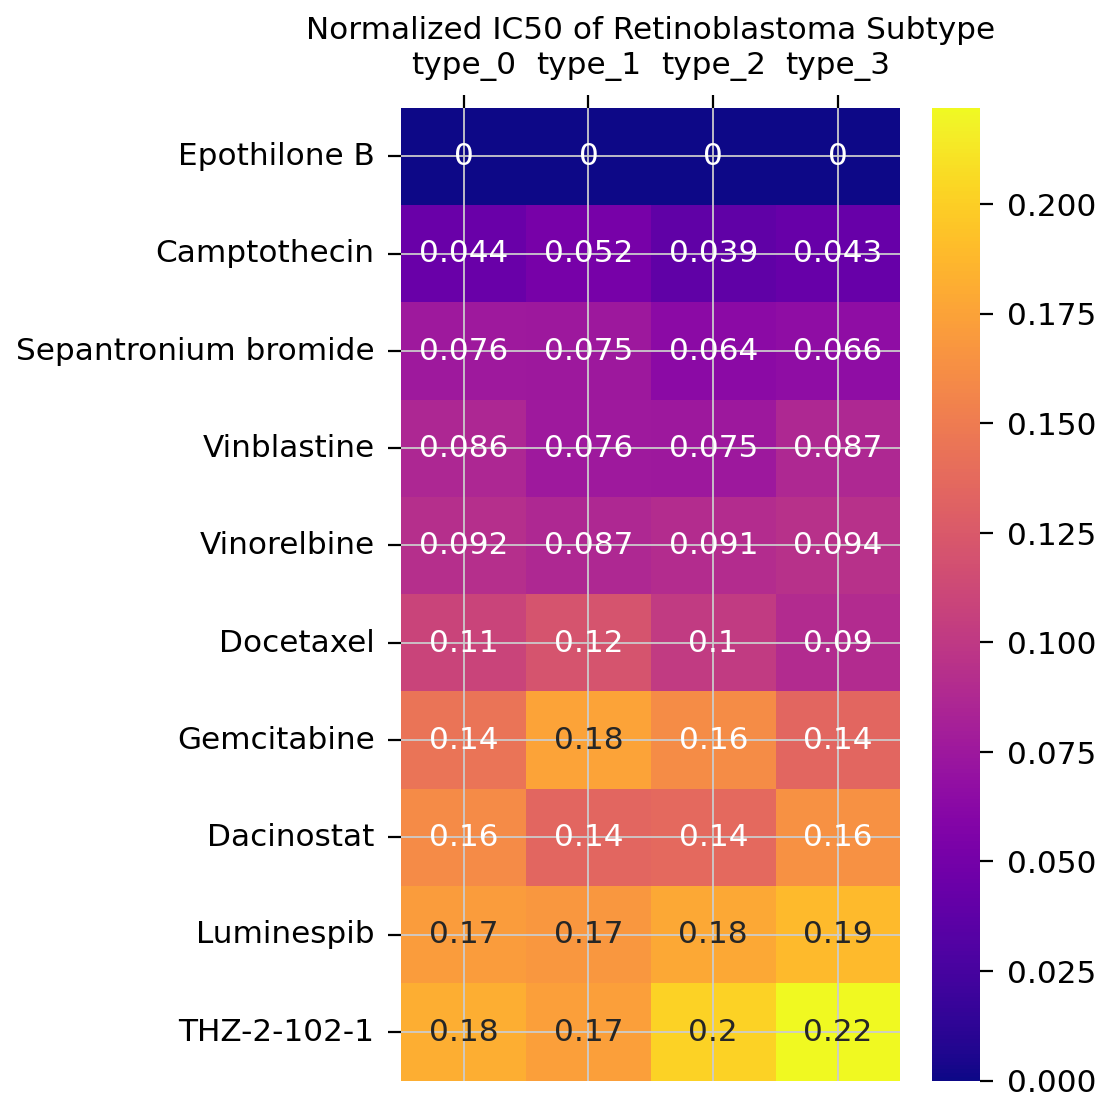

In [ ]:
import matplotlib.pyplot as plt
IC50 = IC50.T.sort_values(by=[0],ascending=True).iloc[0:10,:]
IC50
IC50.columns=['type_0','type_1','type_2','type_3']
fig, ax = plt.subplots(figsize = (5, 8))
ax = sns.heatmap(IC50, annot=True,cmap='plasma')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title('Normalized IC50 of Retinoblastoma Subtype')
plt.savefig("Figure5_IC50.png",dpi=300,bbox_inches = 'tight')

In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
adata_cancer

AnnData object with n_obs × n_vars = 3097 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw', 'cnv_leiden', 'cnv_score', 'cnv_status', 'louvain_r0.4', 'louvain_r0.6', 'louvain_r0.8', 'louvain_r1.0', 'louvain_r1.2', 'louvain_r1.4', 'louvain'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'g

In [ ]:
IC50 = pd.read_csv('/content/drive/MyDrive/Retinoblastoma/scDrug_pred/IC50_prediction.csv',index_col=[0],header=[1])
IC50

Erlotinib  AICA Ribonucleotide  Camptothecin  Vinblastine  \
Drug Name                                                              
0              0.656                0.981         0.044        0.086   
1              0.671                0.985         0.052        0.076   
2              0.616                0.964         0.039        0.075   
3              0.595                0.958         0.043        0.087   

           Cisplatin  Cytarabine  Docetaxel  Methotrexate  Gefitinib  \
Drug Name                                                              
0              0.593       0.422      0.109         0.360      0.644   
1              0.605       0.433      0.121         0.353      0.657   
2              0.590       0.416      0.102         0.375      0.634   
3              0.583       0.412      0.090         0.386      0.627   

           Navitoclax  ...  Dasatinib  CGP-60474  CGP-082996  A-770041  \
Drug Name              ...                                               
0               0.464  ...      0.606      0.282       0.665     0.652   
1               0.454  ...      0.643      0.274       0.671     0.668   
2               0.444  ...      0.519      0.245       0.609     0.572   
3               0.472  ...      0.484      0.253       0.591     0.548   

           WH-4-023  BI-2536  BMS-536924  JW-7-52-1  GW843682X  MG-132  
Drug Name                                                               
0             0.691    0.285       0.575      0.352      0.258   0.450  
1             0.709    0.284       0.586      0.337      0.252   0.452  
2             0.623    0.249       0.529      0.319      0.221   0.419  
3             0.609    0.247       0.521      0.332      0.226   0.423  

[4 rows x 171 columns]

In [ ]:
drug_kill_top_20 = drug_kill.T.sort_values(by=[0],ascending=False).iloc[0:20,:]
IC50_top_20 = IC50.T.sort_values(by=[0],ascending=True).iloc[0:20,:]
IC50_top_20

Drug Name                 0      1      2      3
Epothilone B          0.000  0.000  0.000  0.000
Camptothecin          0.044  0.052  0.039  0.043
Sepantronium bromide  0.076  0.075  0.064  0.066
Vinblastine           0.086  0.076  0.075  0.087
Vinorelbine           0.092  0.087  0.091  0.094
Docetaxel             0.109  0.121  0.102  0.090
Gemcitabine           0.144  0.176  0.161  0.135
Dacinostat            0.160  0.135  0.137  0.164
Luminespib            0.171  0.168  0.178  0.189
THZ-2-102-1           0.182  0.173  0.202  0.222
Omipalisib            0.188  0.167  0.185  0.219
Ispinesib Mesylate    0.192  0.198  0.216  0.213
Elesclomol            0.210  0.207  0.194  0.199
Dactolisib            0.232  0.219  0.205  0.220
Doxorubicin           0.233  0.233  0.236  0.244
Paclitaxel            0.237  0.235  0.190  0.176
GW843682X             0.258  0.252  0.221  0.226
CGP-60474             0.282  0.274  0.245  0.253
BI-2536               0.285  0.284  0.249  0.247
SNX-2112              0.288  0.287  0.300  0.315

In [ ]:
IC50_top_20.index.tolist()

['Epothilone B',
 'Camptothecin',
 'Sepantronium bromide',
 'Vinblastine',
 'Vinorelbine',
 'Docetaxel',
 'Gemcitabine',
 'Dacinostat',
 'Luminespib',
 'THZ-2-102-1',
 'Omipalisib',
 'Ispinesib Mesylate',
 'Elesclomol',
 'Dactolisib',
 'Doxorubicin',
 'Paclitaxel',
 'GW843682X',
 'CGP-60474',
 'BI-2536',
 'SNX-2112']

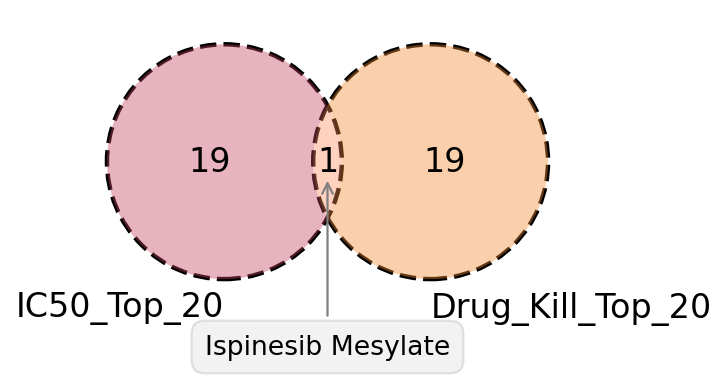

In [ ]:
from matplotlib_venn import venn2,venn2_circles
venn2_circles(subsets=[set(IC50_top_20.index.tolist()),set(drug_kill_top_20.index.tolist())],
        linestyle='--', linewidth=2, color="black",#外框线型、线宽、颜色
        normalize_to=1.0,
       )

v=venn2(subsets=[set(IC50_top_20.index.tolist()),set(drug_kill_top_20.index.tolist())],
      set_labels=('IC50_Top_20','Drug_Kill_Top_20'),
      set_colors=('#C4425D','#F48A30'),
       normalize_to=1.0,)

v.get_label_by_id('10').set_fontsize(15)#1的大小设置为20
v.get_label_by_id('01').set_fontsize(15)#1的大小设置为20
v.get_label_by_id('11').set_fontsize(15)#1的大小设置为20
for t in v.set_labels: 
    t.set_fontsize(15) 
cc=list(set(IC50_top_20.index.tolist()) & set(drug_kill_top_20.index.tolist()))
plt.annotate(str(cc).replace('flag1','\n').replace("'",'').replace('[','').replace(']',''), xy=v.get_label_by_id('110').get_position() - np.array([0, 0.05]), xytext=(0,-80),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)
plt.savefig("top_20_interaction.png",dpi=300,bbox_inches = 'tight')

In [ ]:
IC50.loc[len(IC50.index)] = IC50.mean(0)
drug_kill.loc[len(drug_kill.index)] = drug_kill.mean(0)
drug_kill

Erlotinib  AICA Ribonucleotide  Camptothecin  Vinblastine  \
Drug Name                                                              
0             76.578             55.92600       65.1950      46.8710   
1             70.595             55.46000       53.4040      40.3910   
2             80.810             56.49700       57.8810      41.1150   
3             86.965             58.77200       68.5420      49.4410   
4             78.737             56.66375       61.2555      44.4545   

           Cisplatin  Cytarabine  Docetaxel  Methotrexate  Gefitinib  \
Drug Name                                                              
0           53.42000      55.462   23.74400        81.929     61.026   
1           45.97800      46.377   15.74100        79.250     54.282   
2           47.61500      49.797   19.19800        73.437     58.091   
3           55.09400      58.580   30.75600        76.732     64.573   
4           50.52675      52.554   22.35975        77.837     59.493   

           Navitoclax  ...  Dasatinib  CGP-60474  CGP-082996  A-770041  \
Drug Name              ...                                               
0            74.80900  ...     60.216     29.767    40.72100    50.895   
1            73.03900  ...     45.591     25.961    36.24900    43.165   
2            74.00900  ...     77.752     32.983    52.23400    68.966   
3            72.39600  ...     87.577     39.345    62.54900    79.058   
4            73.56325  ...     67.784     32.014    47.93825    60.521   

           WH-4-023   BI-2536  BMS-536924  JW-7-52-1  GW843682X    MG-132  
Drug Name                                                                  
0            57.592  33.16000    45.71200   24.91100   26.37300  25.72600  
1            49.556  27.26700    38.55700   23.43500   22.11300  21.45200  
2            71.495  36.00300    53.38800   26.93000   29.18900  27.61800  
3            78.517  45.99700    61.65400   30.45100   36.55000  32.73500  
4            64.290  35.60675    49.82775   26.43175   28.55625  26.88275  

[5 rows x 171 columns]

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [ ]:
IC50.T

Drug Name                0      1      2      3        4
Erlotinib            0.656  0.671  0.616  0.595  0.63450
AICA Ribonucleotide  0.981  0.985  0.964  0.958  0.97200
Camptothecin         0.044  0.052  0.039  0.043  0.04450
Vinblastine          0.086  0.076  0.075  0.087  0.08100
Cisplatin            0.593  0.605  0.590  0.583  0.59275
...                    ...    ...    ...    ...      ...
BI-2536              0.285  0.284  0.249  0.247  0.26625
BMS-536924           0.575  0.586  0.529  0.521  0.55275
JW-7-52-1            0.352  0.337  0.319  0.332  0.33500
GW843682X            0.258  0.252  0.221  0.226  0.23925
MG-132               0.450  0.452  0.419  0.423  0.43600

[171 rows x 5 columns]

In [ ]:
sea_drug = pd.DataFrame(index =drug_kill.columns )
sea_drug['drug_kill'] = drug_kill.T.iloc[:,4]
sea_drug['1-IC50']=''
for i in sea_drug.index:
  sea_drug.loc[sea_drug.index==i,'1-IC50'] = 1 - IC50.T.loc[IC50.T.index==i][4]

In [ ]:
sea_drug

drug_kill   1-IC50
Erlotinib             78.73700   0.3655
AICA Ribonucleotide   56.66375    0.028
Camptothecin          61.25550   0.9555
Vinblastine           44.45450    0.919
Cisplatin             50.52675  0.40725
...                        ...      ...
BI-2536               35.60675  0.73375
BMS-536924            49.82775  0.44725
JW-7-52-1             26.43175    0.665
GW843682X             28.55625  0.76075
MG-132                26.88275    0.564

[171 rows x 2 columns]

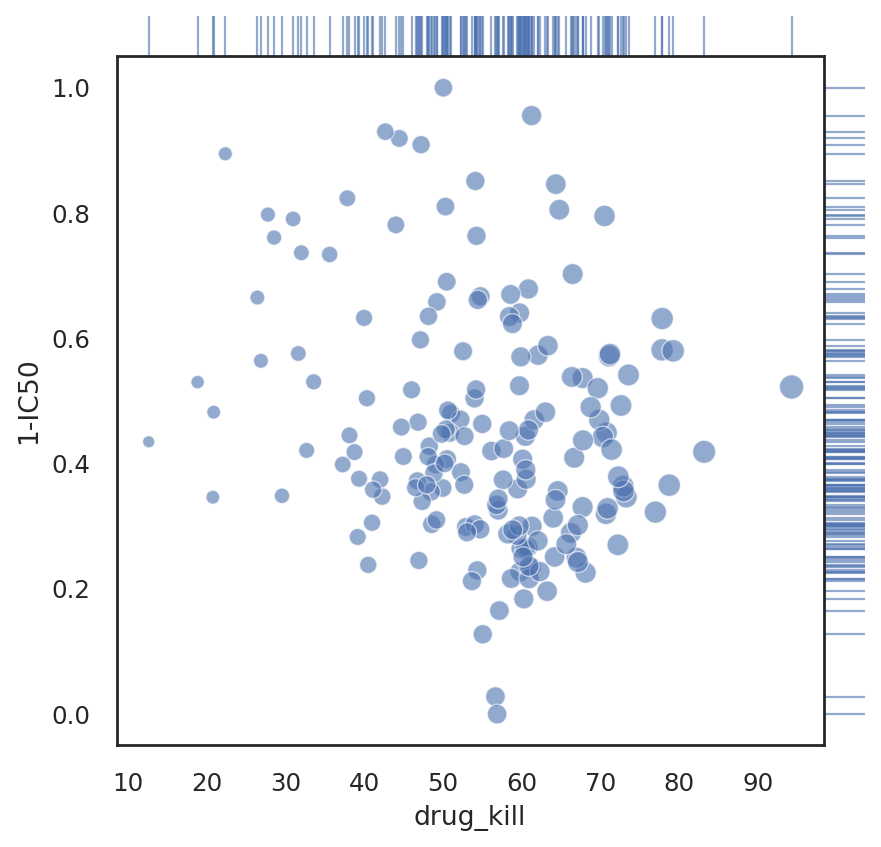

In [ ]:
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
#mpg = sns.load_dataset("mpg")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=sea_drug, x="drug_kill", y="1-IC50", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=sea_drug["drug_kill"], sizes=(30, 120),
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

TypeError: ignored

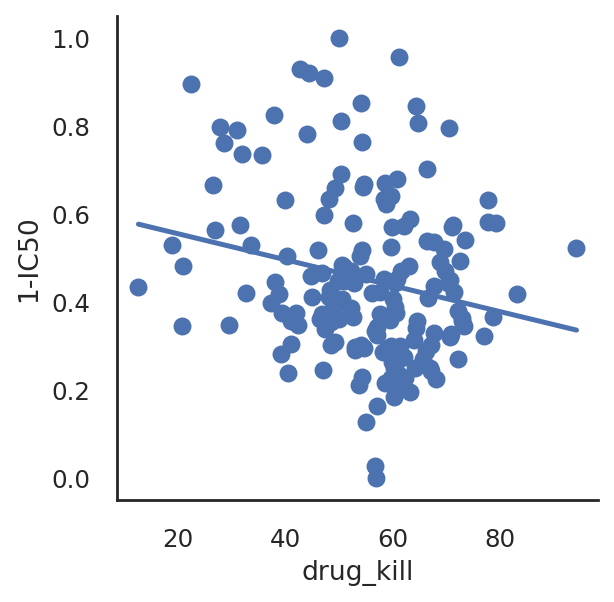

In [ ]:
sns.lmplot(
    data=sea_drug, x="drug_kill", y="1-IC50",
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '0': 'Type 0',#上皮细胞
    '1': 'Type 1',#上皮细胞
    '2': 'Type 2',#上皮细胞
    '3': 'Type 3',#上皮细胞
}
adata_cancer.obs['louvain'] = adata_cancer.obs['louvain'].map(cluster2annotation).astype('category')

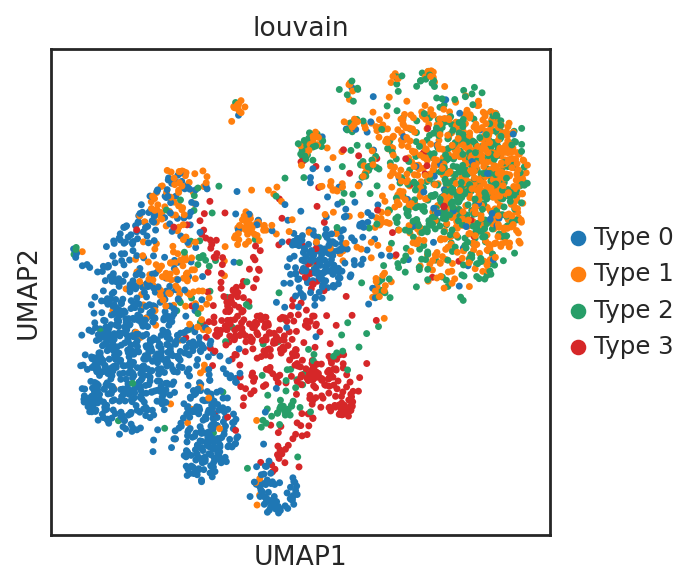

In [ ]:
sc.pl.umap(adata_cancer,color=['louvain'],show=False)
plt.savefig("Figure5_louvain.png",dpi=300,bbox_inches = 'tight')

# AUCell for Louvain Group

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Retinoblastoma/rna_anno_cnv.h5ad')
adata

AnnData object with n_obs × n_vars = 20105 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw', 'cnv_leiden', 'cnv_score', 'cnv_status'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell', 'dispersions', 'dispersions_norm'
    uns: 'Developmental_Stage_colors', '__scglue__', 

In [ ]:
!pip install deep-forest
!pip install -U Pyomic
!pip install -U numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 52.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import Pyomic
import scanpy as sc

Pyomic.utils.pyomic_plot_set()

Creating directory /root/.config/bioservices 
/usr/local/lib/python3.9/dist-packages/phate/__init__.py


In [ ]:
Pyomic.utils.download_pathway_database()
Pyomic.utils.download_geneid_annotation_pair()

......Pathway Geneset download start: GO_Biological_Process_2021
......Downloading dataset save to genesets/GO_Biological_Process_2021.txt
......Creating directory genesets
......[GO_Biological_Process_2021 Size of file]: 0.15 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！0.4903898239135742.2f s
......Pathway Geneset download start: GO_Cellular_Component_2021
......Downloading dataset save to genesets/GO_Cellular_Component_2021.txt
......[GO_Cellular_Component_2021 Size of file]: 0.03 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！0.38188838958740234.2f s
......Pathway Geneset download start: GO_Molecular_Function_2021
......Downloading dataset save to genesets/GO_Molecular_Function_2021.txt
......[GO_Molecular_Function_2021 Size of file]: 0.03 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！0.38195180892944336.2f s
......Pathway Geneset downlo

In [ ]:
pathway_dict=Pyomic.utils.geneset_prepare('genesets/GO_Biological_Process_2021.txt',organism='Human')

In [ ]:
selected_keys = ['attachment of mitotic spindle microtubules to kinetochore (GO:0051315)', # 有丝分裂纺锤体微管与动粒的附着
          'astral microtubule organization (GO:0030953)', #星体微管组织
          'positive regulation of mitotic cell cycle spindle assembly checkpoint (GO:0090267)',#'有丝分裂细胞周期纺锤体组装检查点的阳性调节（GO:00090267）'，
          'G1/S transition of mitotic cell cycle (GO:0000082)',
          'G2/M transition of mitotic cell cycle (GO:0000086)',
          'mesenchymal to epithelial transition (GO:0060231)',
          'positive regulation of epithelial to mesenchymal transition (GO:0010718)',
          'DNA damage response, signal transduction by p53 class mediator resulting in cell cycle arrest (GO:0006977)',
          ]

new_dict = {key: pathway_dict[key] for key in selected_keys if key in pathway_dict}


In [ ]:
##Assest all pathways
#adata_aucs=Pyomic.single.pathway_aucell_enrichment(adata_cancer,
#                         pathways_dict=new_dict,
#                        num_workers=8)

In [ ]:
#adata_aucs.obs=adata_cancer[adata_aucs.obs.index].obs
#adata_aucs.obsm=adata_cancer[adata_aucs.obs.index].obsm
#adata_aucs.obsp=adata_cancer[adata_aucs.obs.index].obsp
#adata_aucs

In [ ]:
#adata_aucs.write_h5ad('/content/drive/MyDrive/Retinoblastoma/adata_aucs.h5ad',compression='gzip')

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Retinoblastoma/rna_anno_cnv.h5ad')
adata

AnnData object with n_obs × n_vars = 20105 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw', 'cnv_leiden', 'cnv_score', 'cnv_status'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'ID', 'copy_num_ID', 'coverage', 'db_xref', 'extra_copy_number', 'gbkey', 'gene', 'gene_biotype', 'gene_name', 'dell', 'dispersions', 'dispersions_norm'
    uns: 'Developmental_Stage_colors', '__scglue__', 

In [ ]:
adata_raw = sc.read_h5ad('/content/drive/MyDrive/Retinoblastoma/RB-origin_rna.h5ad')

In [ ]:
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.obsm = adata.obsm
sc.pp.filter_genes(adata_raw, min_cells=50)
adata_raw

filtered out 38997 genes that are detected in less than 50 cells


AnnData object with n_obs × n_vars = 20105 × 25205
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Tissue', 'Developmental_Stage', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'domain', 'leiden', 'balancing_weight', 'n_counts', 'major_celltype', 'obs_index_raw', 'cnv_leiden', 'cnv_score', 'cnv_status'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'End', 'Start', 'n_cells'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_glue', 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    'Astrocytes': 'Astrocytes',
    'Lymphocytes': 'Lymphocytes',
    'Müller glia cells': 'Müller glia cells',
    'P-Photoreceptor cells': 'P-Photoreceptor cells',
    'Photoreceptor cells': 'Photoreceptor cells',
    'RPE cells': 'RPE cells',
    'Retinal stem cells': 'Retinal stem cells',
    'STER cells': 'STER cells(Cancer cells)'
}
adata_raw.obs['major_celltype_new'] = adata_raw.obs['major_celltype'].map(cluster2annotation).astype('category')

In [ ]:
#adata = adata.raw.to_adata()
#adata

In [ ]:
#adata_raw.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_raw, 'major_celltype_new', method='t-test',use_raw=False, layern_genes=2000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


In [ ]:
adata_raw.X.max()

11341.0

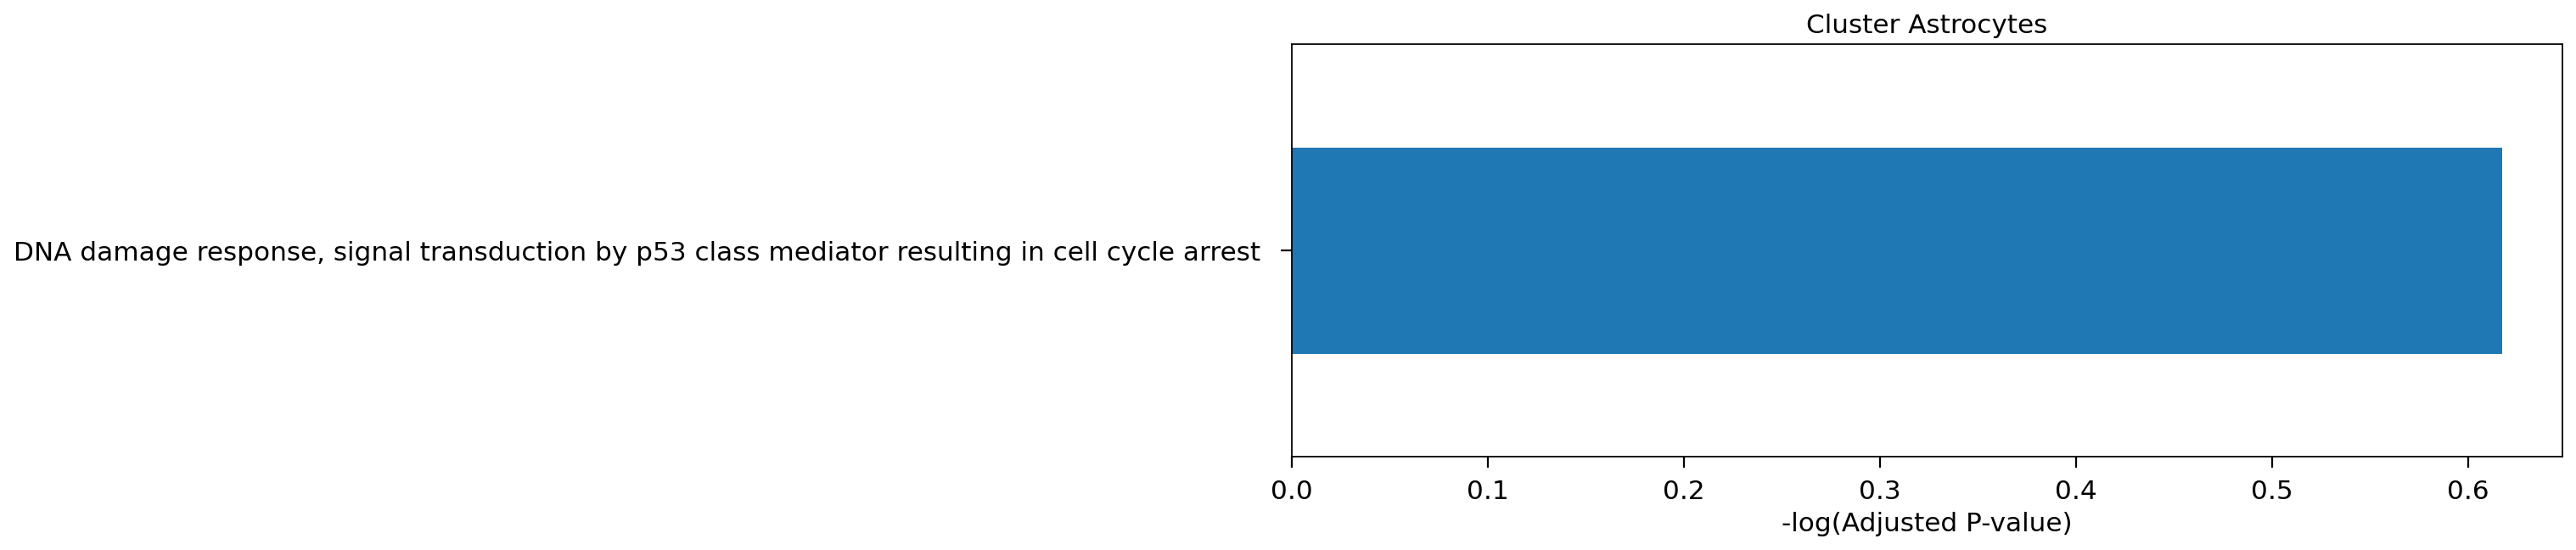

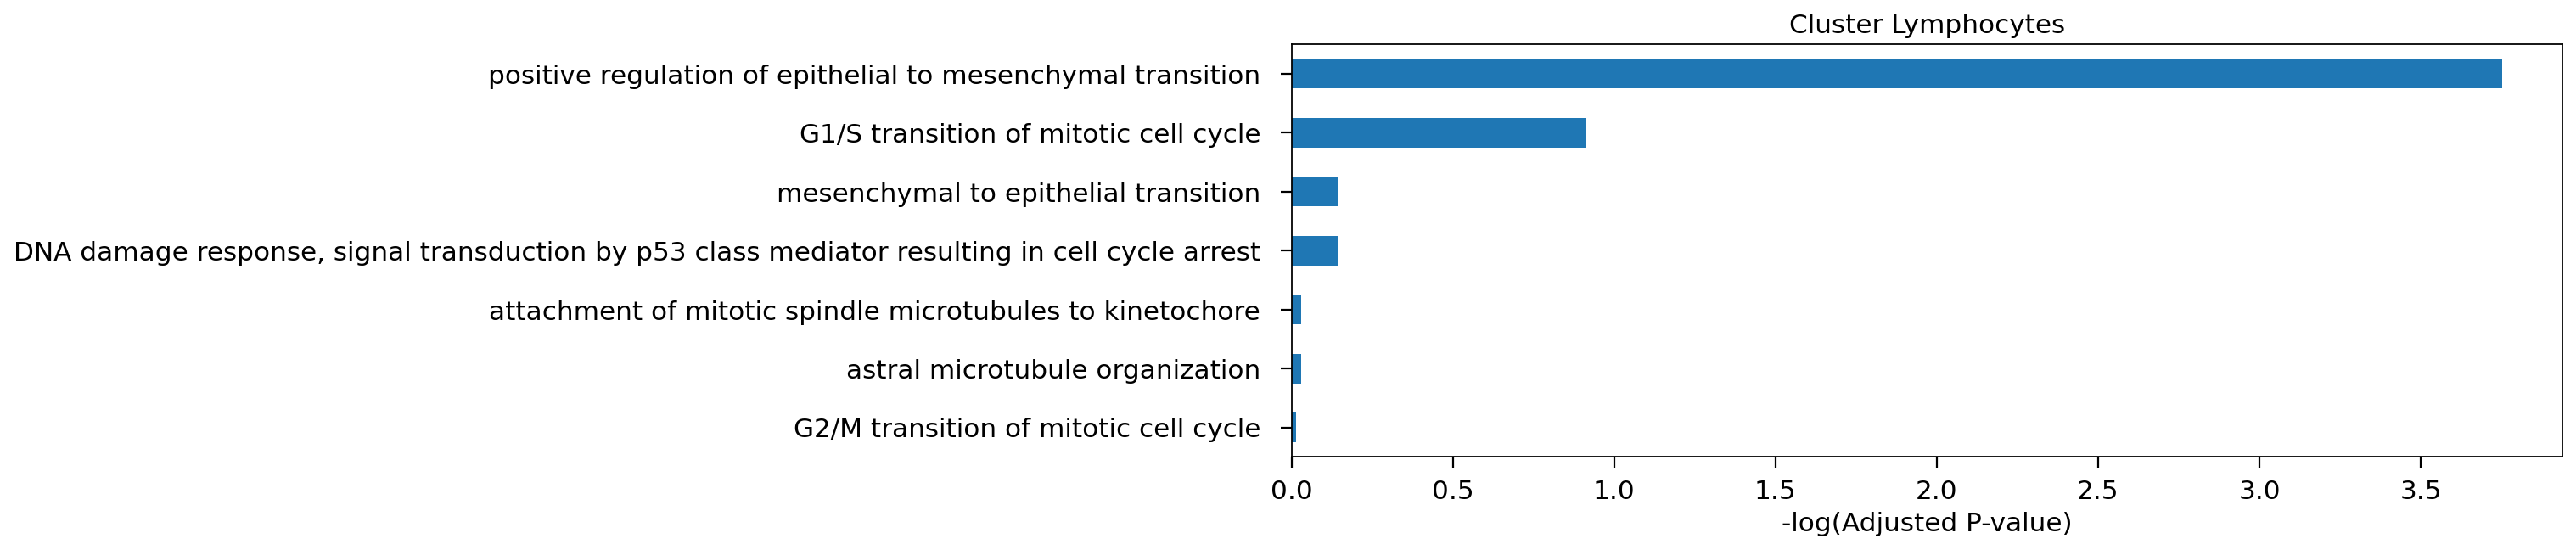

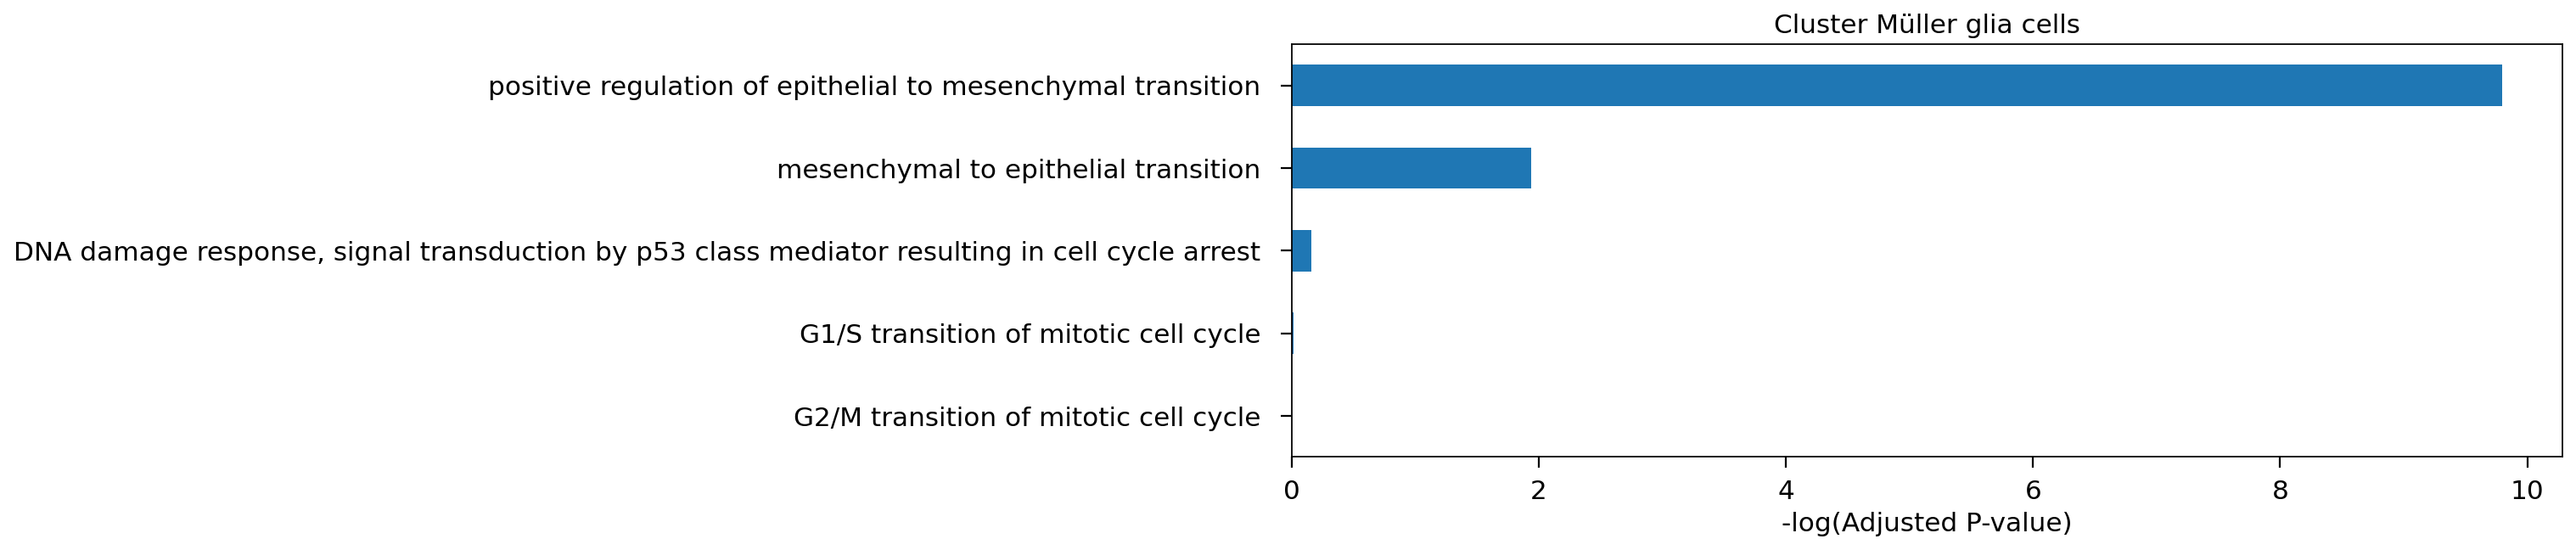

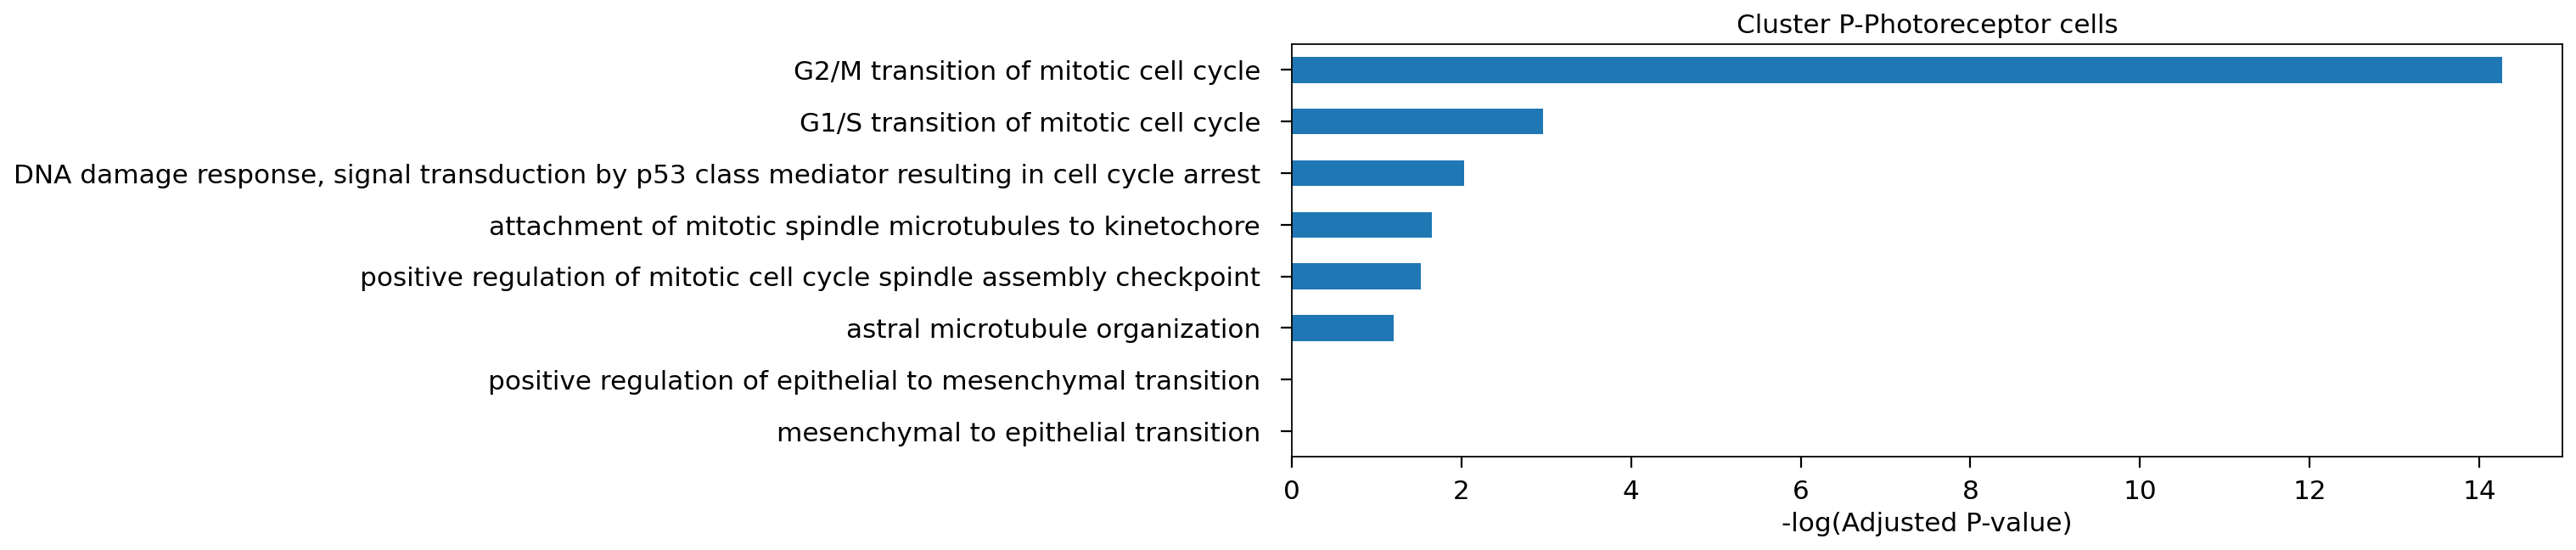

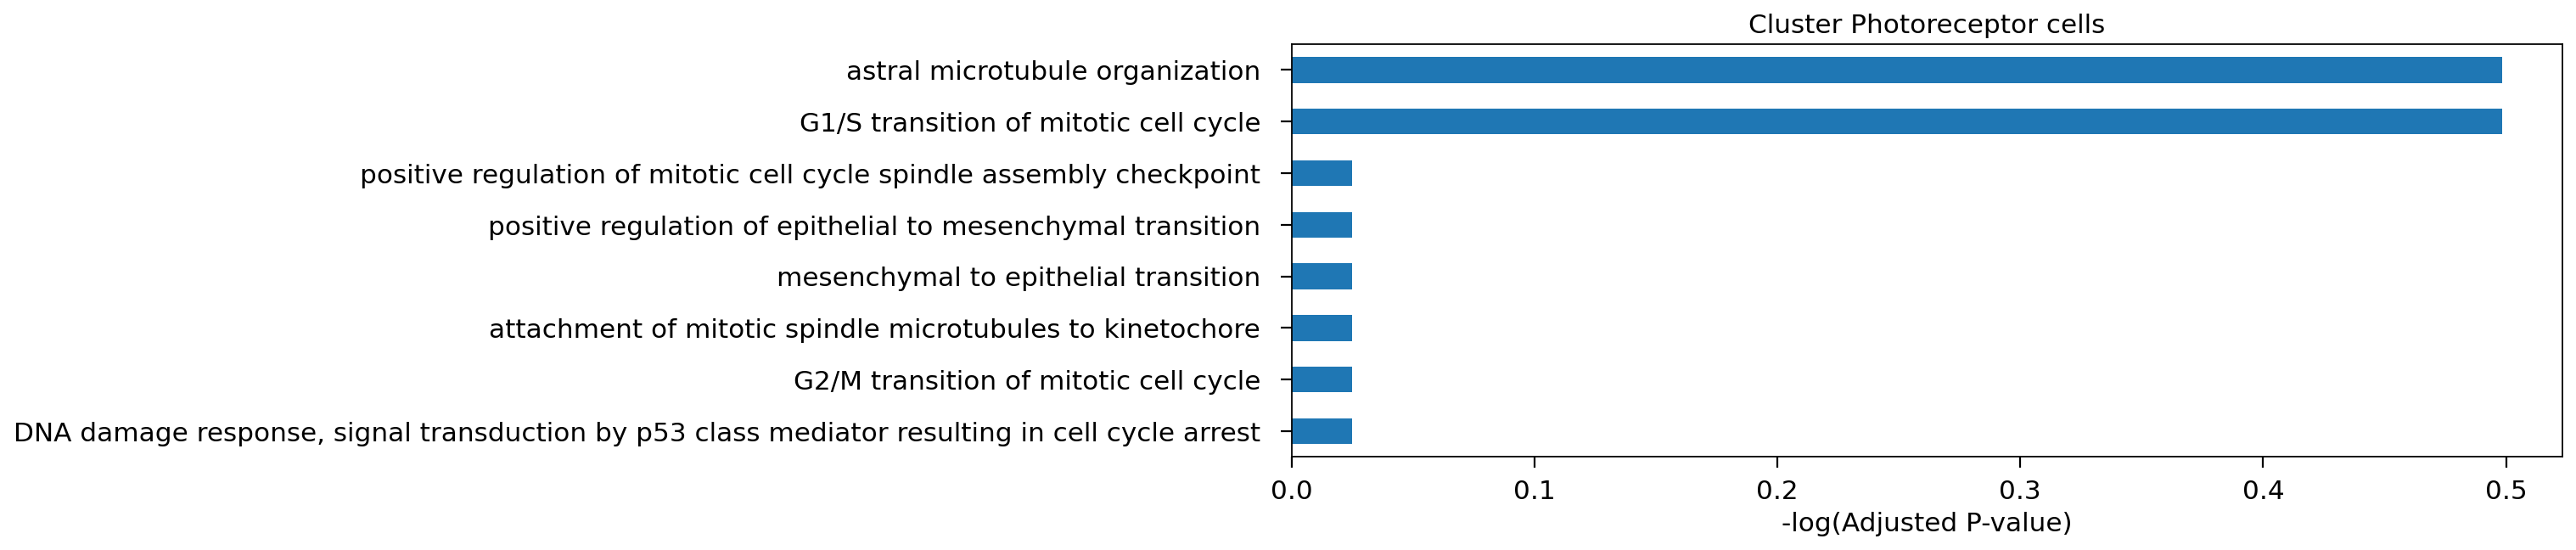

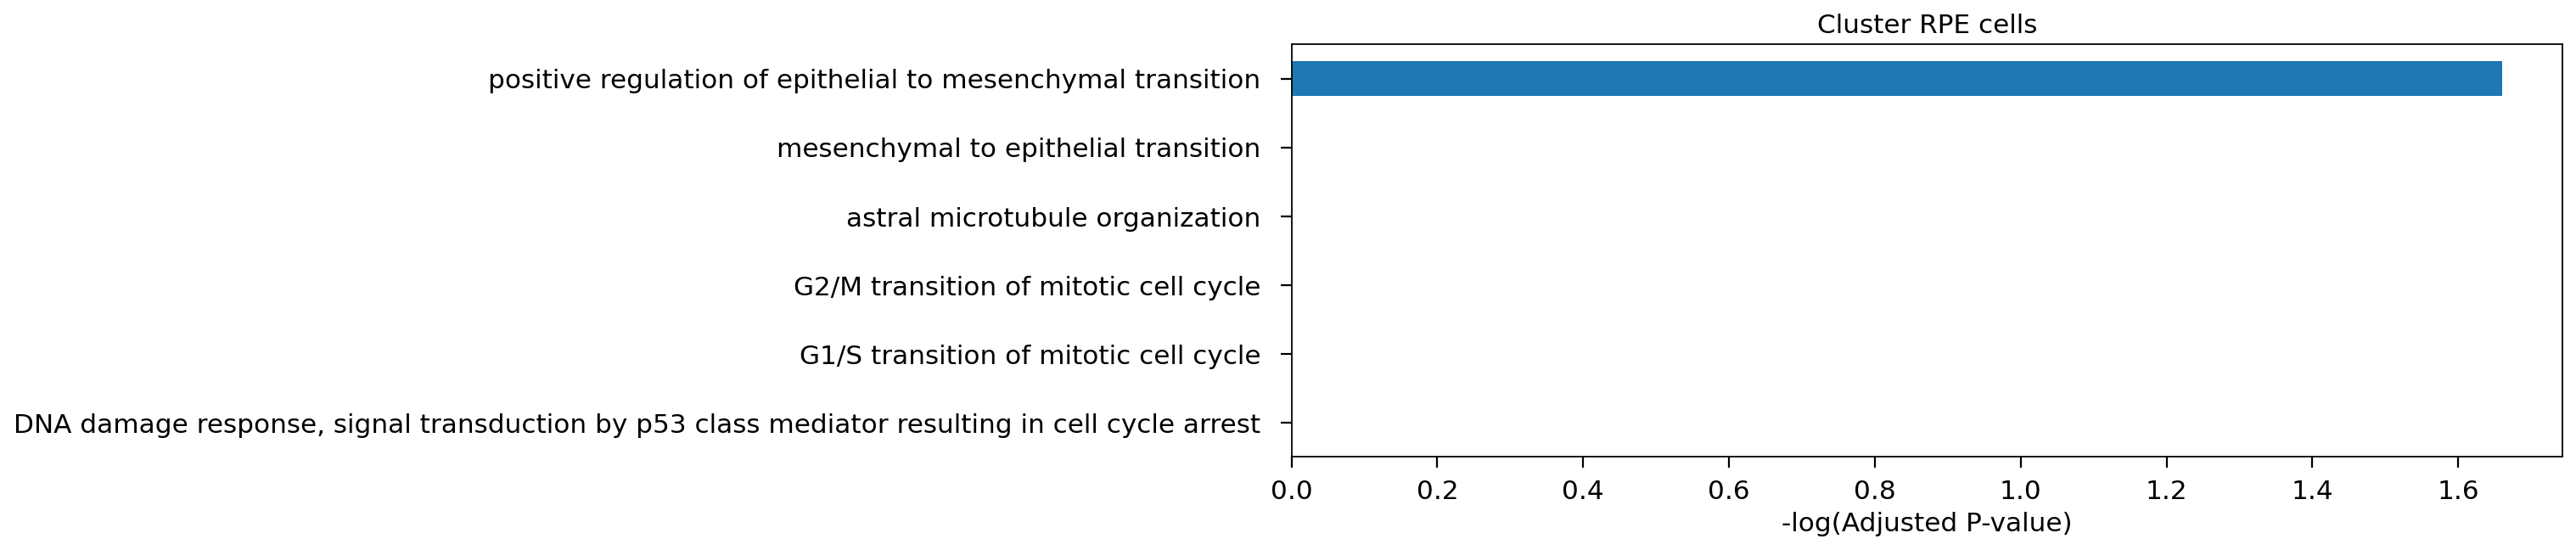

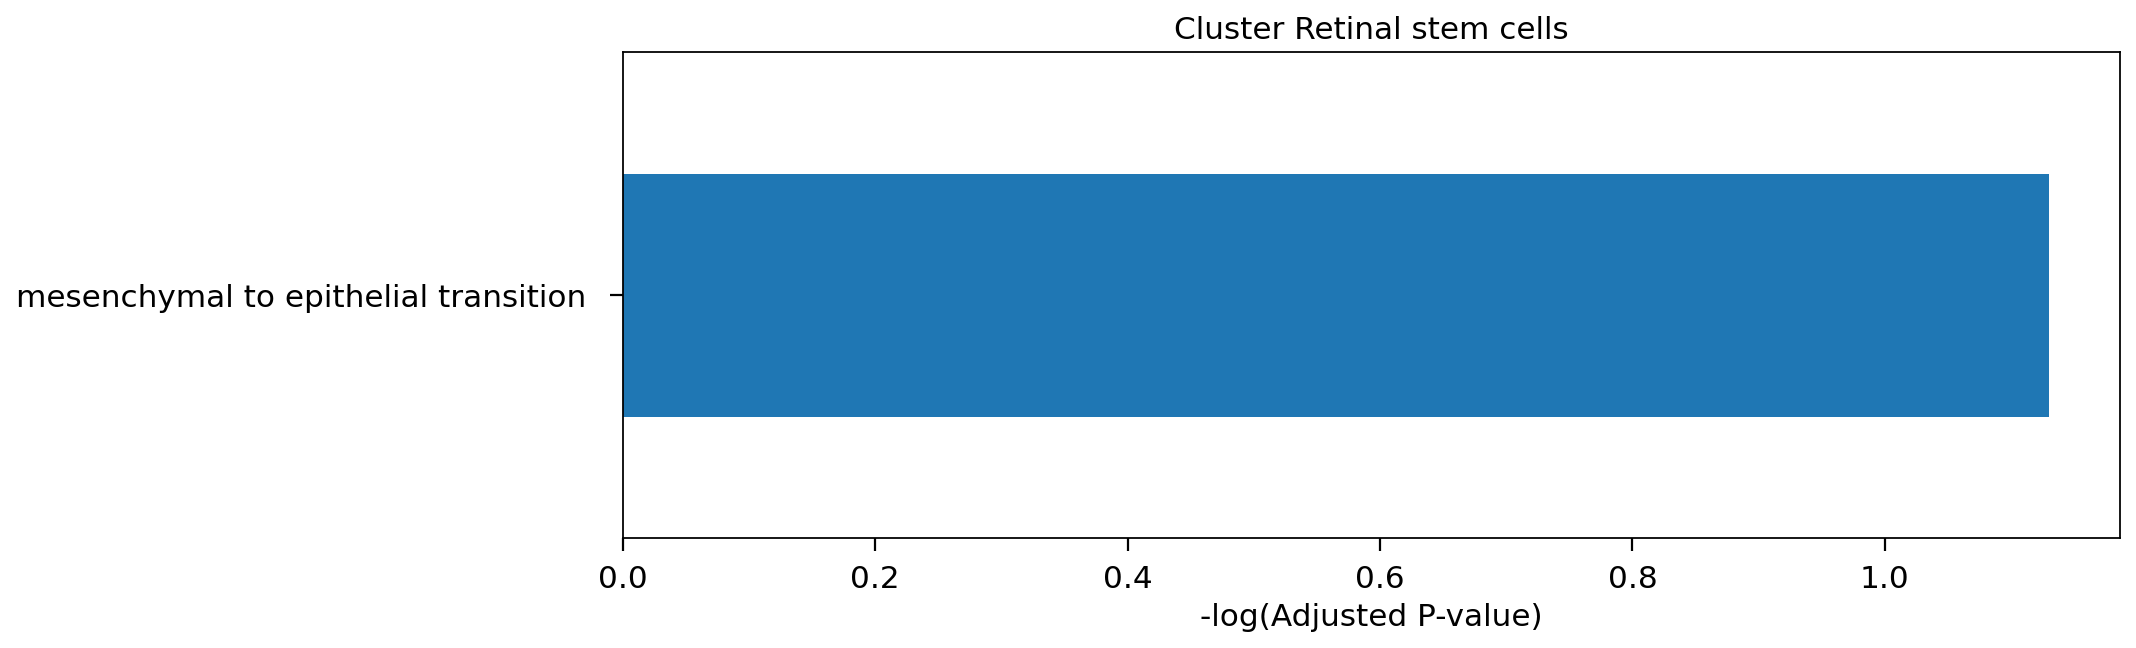

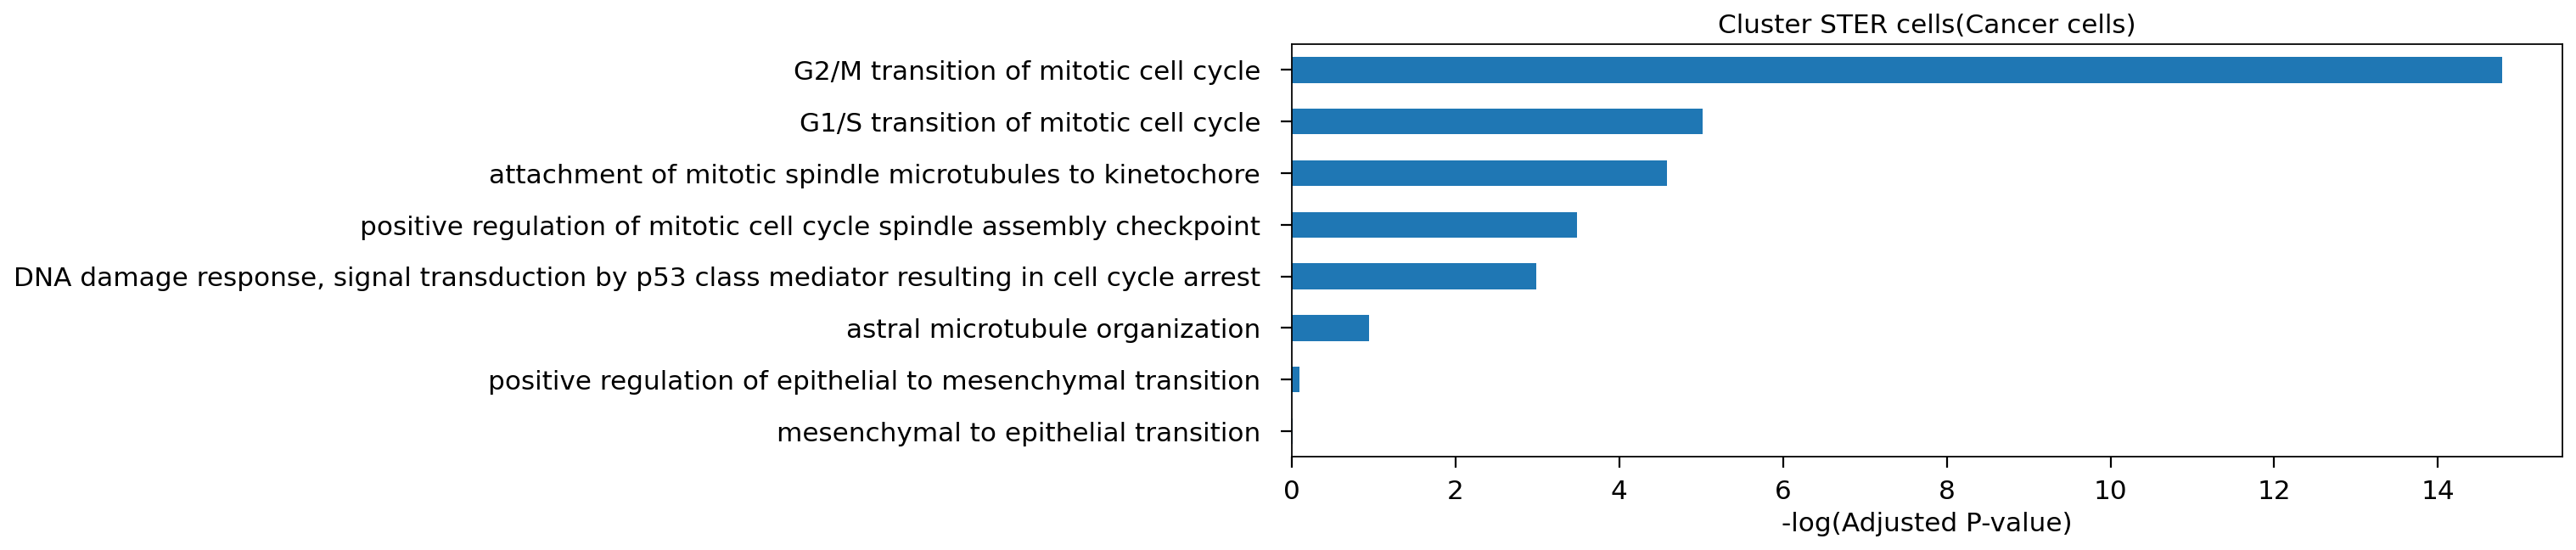

In [ ]:
res=Pyomic.single.pathway_enrichment(adata_raw,
                  pathways_dict=new_dict,
                  organism='Human',
                  logfc_threshold=1,
                  group_by='major_celltype_new',
                  plot=True,
                  cutoff=1)

In [ ]:
#绘图参数设置
sc.settings.verbosity=3
sc.settings.set_figure_params(dpi=80,facecolor='white')

In [ ]:
# 对文字部分过长的通路进行裁剪
#!pip install colormap
def plot_text_set(text):
    if len(text)>40:
        ty=text.split(' ')
        ty_len=len(ty)
        ty_mid=ty_len//2
        res=''
        for i in range(ty_len):
            if i!=ty_mid:
                res+=ty[i]+' '
            else:
                res+='\n'+ty[i]+' '
        return res
    else:
        return text


In [ ]:
# 只需要添加
res['Term_new'] =res['Term']
for i in set(res['Term']):
  res.loc[res.loc[:,'Term']==i,'Term_new'] = plot_text_set(set(res.loc[res.loc[:,'Term']==i,'Term']).pop())
res['Term'] = res['Term_new']

In [ ]:
# 设置色卡
sc_color_Gene=['#F3F3F3', #浅色
        '#FC9070',
        '#67000D', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

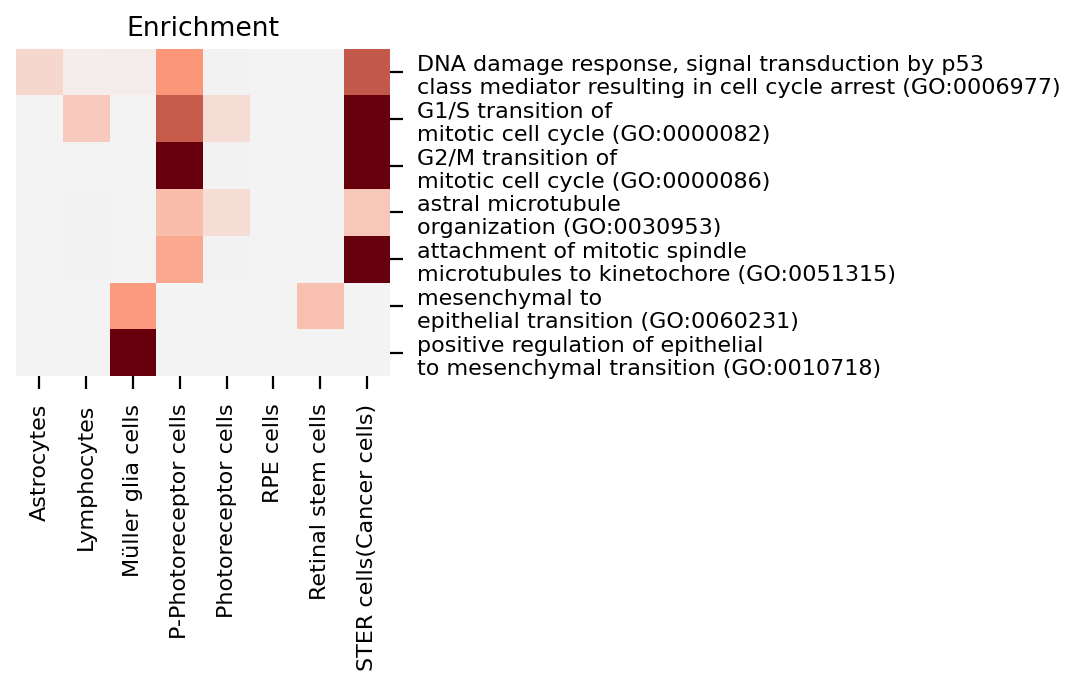

In [ ]:
ax=pathway_enrichment_plot(res,plot_title='Enrichment',cmap=genecmap,center=None,
                     xticklabels=True,cbar=False,square=True,vmax=10,
                     yticklabels=True,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})

In [ ]:
enrich_res = res


celltypes=enrich_res['Cluster'].unique()
plot_heatmap=pd.DataFrame(index=celltypes)
for celltype in celltypes:
    res_test=enrich_res.loc[enrich_res['Cluster']==celltype].iloc[:5]
    plot_heatmap_test=pd.DataFrame(res_test[['Term','logp']])
    plot_heatmap_test=plot_heatmap_test.set_index(plot_heatmap_test['Term'])
    del plot_heatmap_test['Term']
        #plot_heatmap[plot_heatmap_test.index]=0
    for i in plot_heatmap_test.index:
        if len(enrich_res.loc[(enrich_res['Cluster']==celltype)&(enrich_res['Term']==i),'logp'].values)!=0:
            plot_heatmap.loc[celltype,i]=enrich_res.loc[(enrich_res['Cluster']==celltype)&(enrich_res['Term']==i),'logp'].values[0]
        else:
            plot_heatmap.loc[celltype,i]=0

plot_heatmap.fillna(0)

In [ ]:
plot_heatmap

DNA damage response, signal transduction by p53 \nclass mediator resulting in cell cycle arrest (GO:0006977)   \
Astrocytes                                                         1.421835                                                               
Lymphocytes                                                        0.331099                                                               
Müller glia cells                                                  0.375390                                                               
P-Photoreceptor cells                                              4.689446                                                               
Photoreceptor cells                                                0.057435                                                               
RPE cells                                                          0.000631                                                               
Retinal stem cells                                                 0.000000                                                               
STER cells(Cancer cells)                                           6.886882                                                               

                          G1/S transition of \nmitotic cell cycle (GO:0000082)   \
Astrocytes                                                         0.000000       
Lymphocytes                                                        2.102837       
Müller glia cells                                                  0.033128       
P-Photoreceptor cells                                              6.813807       
Photoreceptor cells                                                1.147494       
RPE cells                                                          0.000631       
Retinal stem cells                                                 0.000000       
STER cells(Cancer cells)                                          11.558434       

                          G2/M transition of \nmitotic cell cycle (GO:0000086)   \
Astrocytes                                                         0.000000       
Lymphocytes                                                        0.029561       
Müller glia cells                                                  0.010624       
P-Photoreceptor cells                                             32.849252       
Photoreceptor cells                                                0.057435       
RPE cells                                                          0.000631       
Retinal stem cells                                                 0.000000       
STER cells(Cancer cells)                                          34.038041       

                          astral microtubule \norganization (GO:0030953)   \
Astrocytes                                                       0.000000   
Lymphocytes                                                      0.067062   
Müller glia cells                                                0.000000   
P-Photoreceptor cells                                            2.760282   
Photoreceptor cells                                              1.147494   
RPE cells                                                        0.000631   
Retinal stem cells                                               0.000000   
STER cells(Cancer cells)                                         2.184663   

                          attachment of mitotic spindle \nmicrotubules to kinetochore (GO:0051315)   \
Astrocytes                                                         0.000000                           
Lymphocytes                                                        0.067062                           
Müller glia cells                                                  0.000000                           
P-Photoreceptor cells                                              3.804223                           
Photoreceptor cells                                                0.

In [ ]:
def pathway_enrichment_plot(enrich_res,term_num=5,return_table=False,figsize=(3,10),plot_title='',**kwds):
    """
    Visualize the pathway enrichment analysis results as a heatmap.

    Parameters:
    ----------
    - enrich_res : `pandas DataFrame`
        The output from the pathway_enrichment() function.
    - term_num : `int`, optional
        The number of enriched terms to display for each cluster. Default is 5.
    - return_table : `bool`, optional
        Whether to return the heatmap table as a DataFrame. Default is False.
    - figsize : `tuple`, optional
        The size of the plot. Default is (3,10).
    - plot_title : `str`, optional
        The title of the plot. Default is an empty string.
    - **kwds : optional
        Other keyword arguments to pass to the seaborn heatmap function.

    Returns:
    -------
    - ax : `matplotlib Axes object`
        The heatmap plot.

    Examples:
    --------
    >>> res = pathway_enrichment(adata, pathways_dict)
    >>> pathway_enrichment_plot(res, term_num=10, return_table=True, figsize=(6,12), cmap='Blues')
    """
    celltypes=enrich_res['Cluster'].unique()
    plot_heatmap=pd.DataFrame(index=celltypes)
    for celltype in celltypes:
        res_test=enrich_res.loc[enrich_res['Cluster']==celltype].iloc[:term_num]
        plot_heatmap_test=pd.DataFrame(res_test[['Term','logp']])
        plot_heatmap_test=plot_heatmap_test.set_index(plot_heatmap_test['Term'])
        del plot_heatmap_test['Term']
        #plot_heatmap[plot_heatmap_test.index]=0
        for i in plot_heatmap_test.index:
            if len(enrich_res.loc[(enrich_res['Cluster']==celltype)&(enrich_res['Term']==i),'logp'].values)!=0:
                plot_heatmap.loc[celltype,i]=enrich_res.loc[(enrich_res['Cluster']==celltype)&(enrich_res['Term']==i),'logp'].values[0]
            else:
                plot_heatmap.loc[celltype,i]=0
    plot_heatmap.fillna(0,inplace=True)
    if return_table==True:
        return plot_heatmap

    fig,ax=plt.subplots(figsize=figsize)
    axr=sns.heatmap(plot_heatmap.T,ax=ax,**kwds)
    axr.tick_params(right=True, top=False,left=False, labelright=True, labelleft=False,labeltop=False,rotation=0)
    ax.set_title(plot_title,fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
    plt.grid(False)
    
    return ax

In [ ]:
!pip install git+https://github.com/DingWB/PyComplexHeatmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DingWB/PyComplexHeatmap to /tmp/pip-req-build-bxa3i4ni
  Running command git clone --filter=blob:none --quiet https://github.com/DingWB/PyComplexHeatmap /tmp/pip-req-build-bxa3i4ni
  Resolved https://github.com/DingWB/PyComplexHeatmap to commit c4700a279ae20aa20f85000fe813ae4f59297c36
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyComplexHeatmap: filename=PyComplexHeatmap-1.4.1-py3-none-any.whl size=56569 sha256=3d66af9bd7ebdcbd02213ceaa1fc00eaee040e04324f91f58fd3124b76b4fa9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yyhskgcc/wheels/99/39/4d/ad630d5961c7e85f9e950e13986f945ad7ab0df74a6279c67b
Successfully built PyComplexHeatmap


In [ ]:
import os,sys               #与python解释器进行交互的库
import PyComplexHeatmap
from PyComplexHeatmap import *
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi']  = 120
plt.rcParams['savefig.dpi'] = 300    #设置保存的图片大小

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


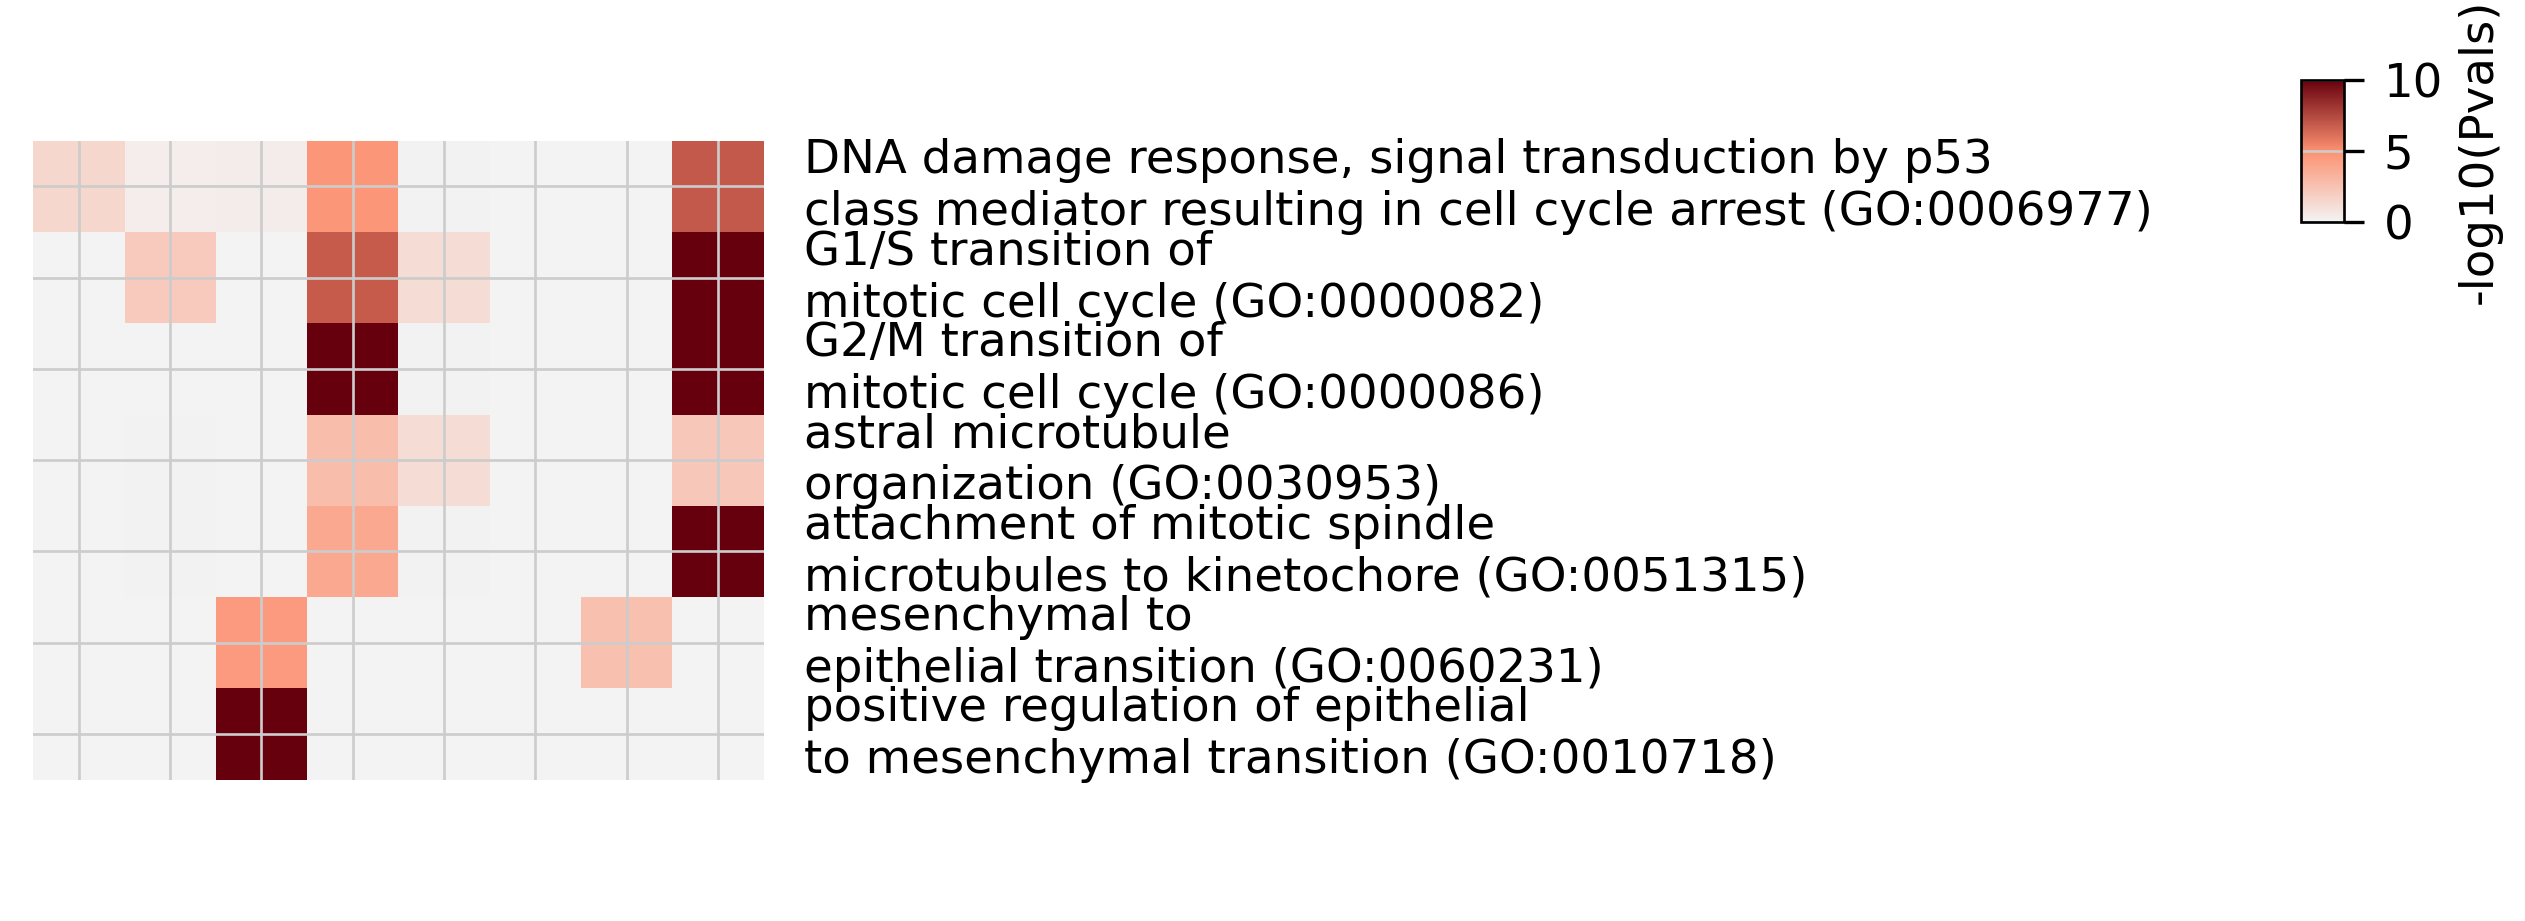

In [139]:
cm = ClusterMapPlotter(data=plot_heatmap.T, #z_score = True,
                       row_cluster = False, # 设置禁止自动聚类！！！
                       col_cluster = False, # 设置禁止自动聚类！！！ 这个逼函数聚类参数默认是True
                       row_names_side = 'right',  # 基因名放右边
                       label='-log10(Pvals)',  # 热图颜色设置
                       row_dendrogram = False,
                       show_rownames = True,
                       show_colnames = False,
                       cmap =genecmap, # Values的色卡
                       legend = True, # 不画图例 下面画
                       vmax=10,
                      # legend_hpad = 0.5,#热图和图例之间间隙
                      # legend_vpad = 0.5,
                      # legend_side = 'left', # 图例放左边
                       row_split_gap = 2, # 横向分割间距
                       col_split_gap = 0.4, # 纵向分割间距
                    # tree_kws={'row_cmap': 'Dark2'}
                    square=True,
                    )
